---
---

# **1 - Random Forests**

* Random Forests have the the ability to greatly increase performance based on expanding ideas from the Decision Tree.
* Random Forests are known as **ensemble** learners, since the rely on an ensemble of models (multiple decision trees).


Why not just continue to use Decision Tree?

**Drawbacks of Decision Tree:**

1. Restricted by giny impurity
2. No guarantee of using all features
3. Root node will always be the same
4. Root feature has huge influence over the tree

    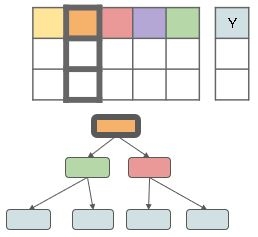

**We could try adjusting rules, such as:**
* Splitting Criterion (Information Gain)
* Minimum Gini Impurity Decrease
* Setting Depth Limits
* Limits on number of terminal leaf nodes

However even with all these added hyperparameter adjustments, the single decision tree is still **limited**:

* Single feature for root node
* Splitting criteria can lead to some features not being used
* Potential for overfitting the data

---
**How Random Forest Works**

---

Create subsets of randomly picked features at each potential split

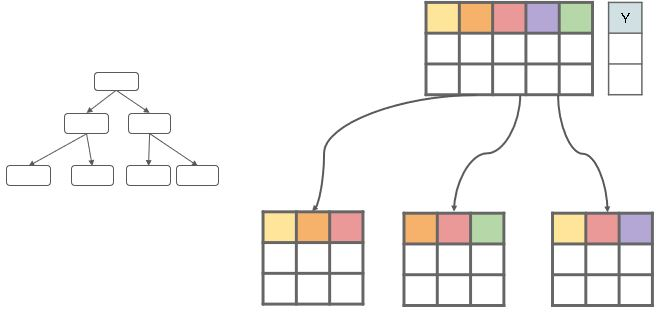

Build multiple trees

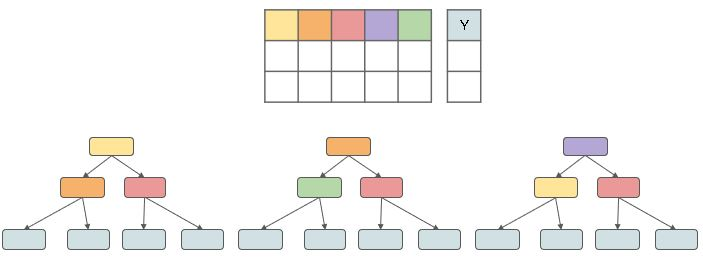

Classification problem

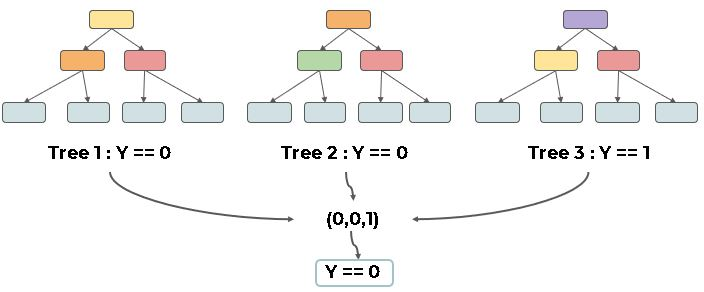

2 votes on 0 and 1 vote on 1

Regression problem

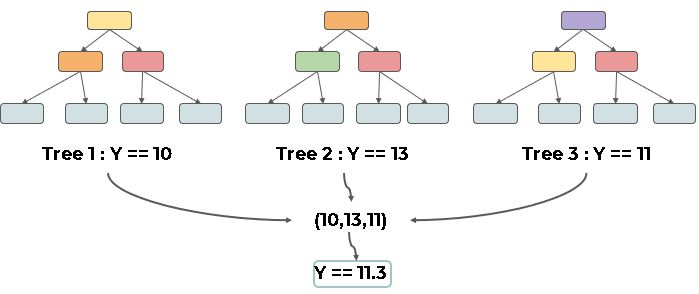

Average of the result is 11.3

Adding the random feature subspace constraint could allow trees to grow much deeper without causing overfitting.

---
**Random Forest Hyperparameters**

---

Random forest huperparameters:

1. Number of Estimators
  * *How many decision trees to use total in forest?*
2. Number of Features
  * *How many features to include in each subset?*
3. Bootstrap Samples
  * *Allow for bootstrap sampling of each training subset of features?*
4. Out-of-Bag Error
  * *Calculate OOB error during training?*

---
**1. Number of Estimators**

* Intuitively, we know the more decision trees, the more opportunities to learn from a variety of feature subset combinations.
* Is there a limit to adding more trees?
* Is there a danger of overfitting?

From **Leo Breiman's official page on Random Forests**: "Random forests does not overfit. You can run as many trees as you want. It is fast"

**How to choose number of trees?**
 * Reasonable Default Value: 100
 * Publications suggest 64-128 trees.
 * Cross Validate a grid search of trees.
 * Plot Error versus number of trees (similar to elbow method of KNN)
  
  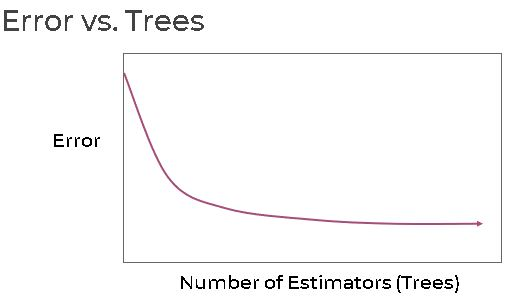

  After a certain number of trees, two things that can occur:
  * Different random selections dont reveal any more information.
    * Trees become highly correlated.
  * Different random selections are simply duplicating trees that have already been created.

---
**2. Number of Features**

From **Leo Breiman's official page on Random Forests**: "An interesting difference between regression and classification is that the correlation increases quite slowly as the number of features used increases"

**Number of Features in subset?**
* Original Publication suggested subset of **$log_2$(N+1)** random features in subset given a set of **N** total features.
* Current suggested convention is **sqrt(N)** in the subset given **N** features.
* Later suggestions by Breiman indicated **N/3** may be more suitable for regression tasks, typically larger than **sqrt(N)**.
* ISLR indicates this should be treated as a tuning parameter, with **sqrt(N)** as a good starting point.
* All the previous options shown were explored using empirical methods, so it is likely you will need to adjust based on your specific dataset.

---
**3. Bootstrap Samples**

**What is Bootstrapping?**
 * A term used to describe "random sampling with replacement".
  

Given a 5 letters, let choose 10 samples from this lettes.

  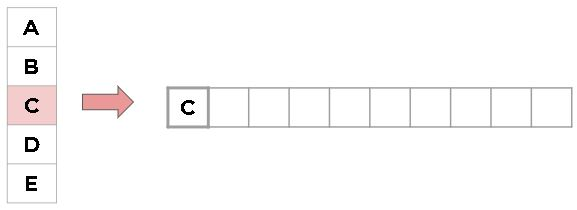

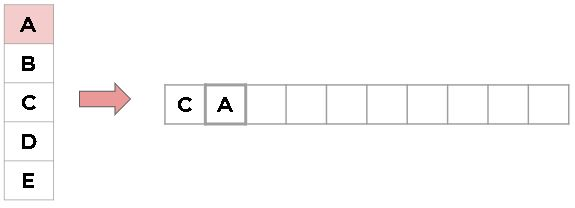

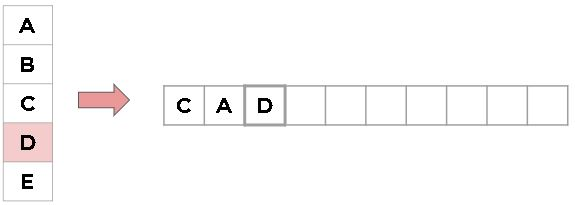

You allowed to pick same samples more than 1 times.

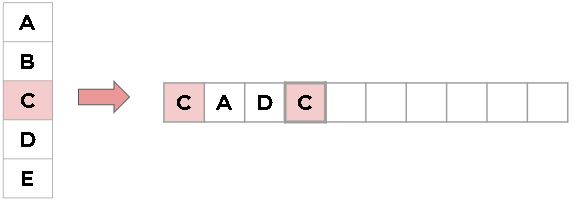

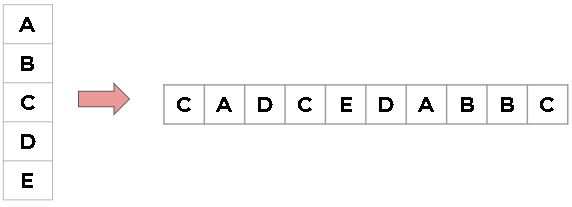

**Bootstrapping in Random Forest**
* Recall for each split we are randomly selecting a subset of features. This random subset of features helps create more diverse trees that are not correlated to each other.
* To further differentiate trees, we could bootstrap a selection rows for each split. This results in two randomized training components:
  * *Subset of Features Used*
  * *Bootstrapped rows of data*

**Bootstrapping in subset of feature**

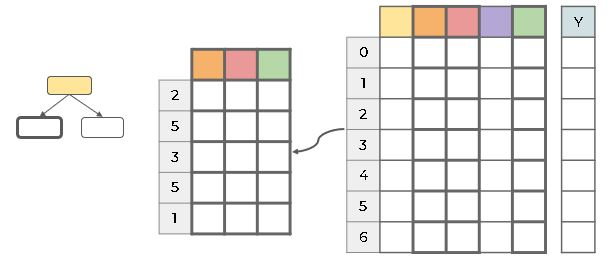

**Bootstrapping** can be set to False during training (it is True by default). **Bootstrapping** is yet another hyperparameter meant to **reduce correlation between trees**, since trees are then trained on different subsets of feature columns and data rows.

---
**4. Out-of-Bag Error**

**What is Bagging?**
* Recall to actually use a Random Forest, we use **bootstrapped** data and then calculate a prediction based on the **aggregated** prediction of the trees:
  * *Classification: Most Voted Y Class*
  * *Regression: Average Predicted Y*
* If we performed **bootstrapping** when building out trees, this means that for certain trees, **certain rows** of data were **not used for training**.

**Out-of-Bag Samples**
* Not used for constructing some trees.
* We could use these to get performance test metrics on trees that did not use these rows.

**Rows that not used for training (from bootstrapping):**

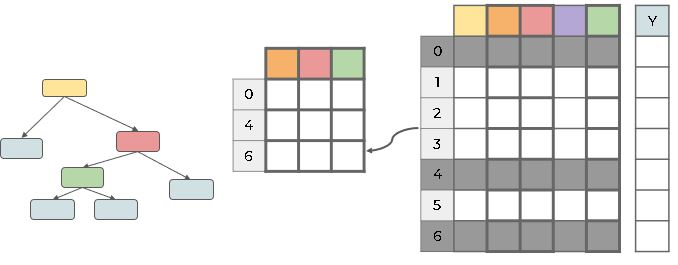

**Calculate OOB Error:**

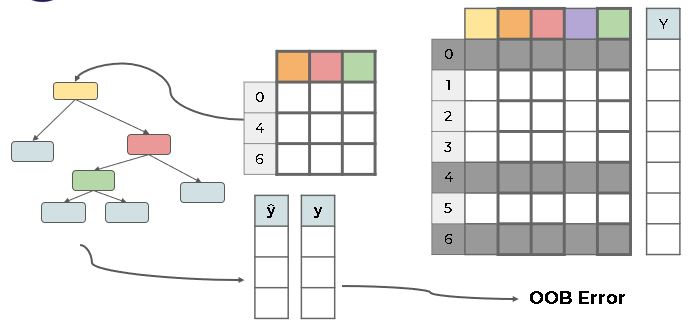

**NOTE:**
* OOB Score is a **hyperparameter** that doesnt really affect training process.
* It is separate from bootstrapping, OOB Score is an **optional** way of measuring performance, an **alternative** to using a standard train/test split, since bootstrapping naturally results in unused data during training.
* It can only be **calculated** on trees that did not use the OOB data. Due to not using the entire random forest, the **default** value of OOB Score hyperparameter is set to **False**.

---
---

# **2 - Random Forest-Classification**

## **A. Data Set**


We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/12_Random_Forest/penguins_size.csv")

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

---

## **B. Exploratory Data Analysis and Feature Engineering**



### **a. Missing Data**

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

Because we only have 3% missing data, it is safe to drop the data.

---

#### **Drop the missing data**

In [ ]:
df = df.dropna() # drop rows that contains any missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
df.shape

(334, 7)

---

### **b. Impute Data**

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


---

#### **Descriptive statistic of Gentoo species by sex**

In [ ]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

Based on data above, the '.' sex tends towards female sex

---

#### **Replace the Value**

In [ ]:
# df.at[index name, column name] = value
df.at[336, 'sex'] = 'FEMALE'

In [ ]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm       217
body_mass_g            4875
sex                  FEMALE
Name: 336, dtype: object

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

'.' sex successfully changed

In [ ]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

---

### **c. Label Count**

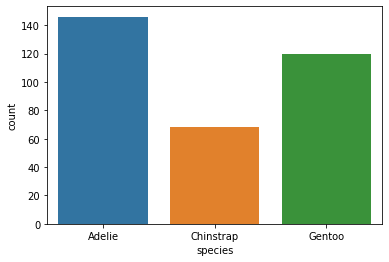

In [ ]:
sns.countplot(x='species', data=df);

In [ ]:
df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

---

### **c. Features Correlation**

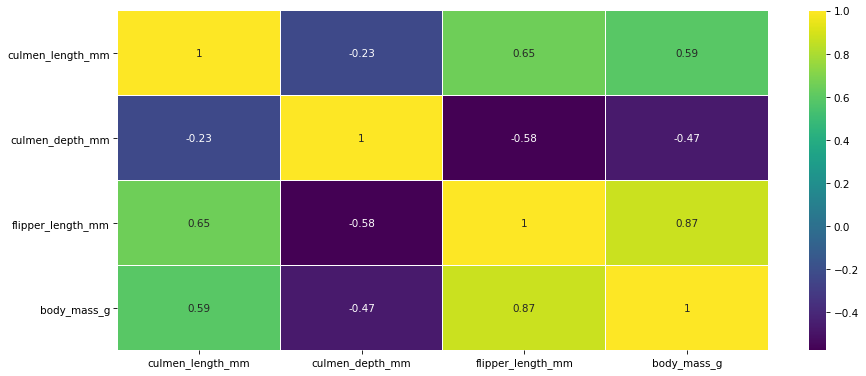

In [ ]:
plt.figure(figsize=(14,6),dpi=75)
sns.heatmap(df.corr(), annot=True, lw=0.1, cmap='viridis');

The correlation between each features

---

### **d. Features Relationship**

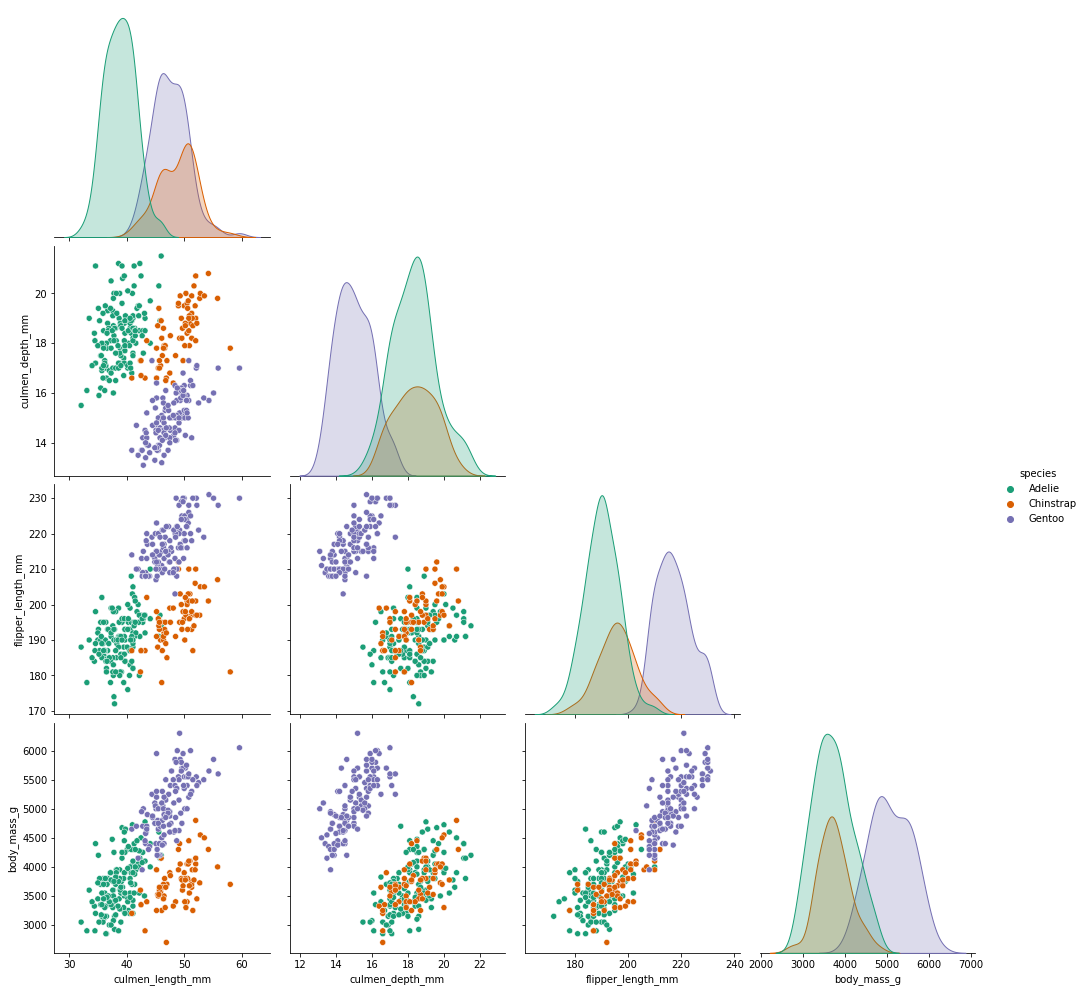

In [ ]:
sns.pairplot(df, hue='species', palette='Dark2', corner=True, height=3.5);

We can see that relationship between culment length and all 3 features are easy to distinguish.

**Note:**

* **left-skewed -> Mean < Median**

* **right-skewed -> Mean > Median**

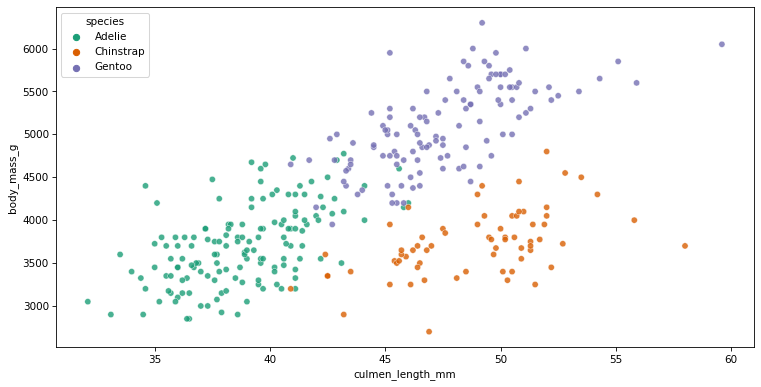

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', data=df, hue='species', palette='Dark2', alpha=0.8);

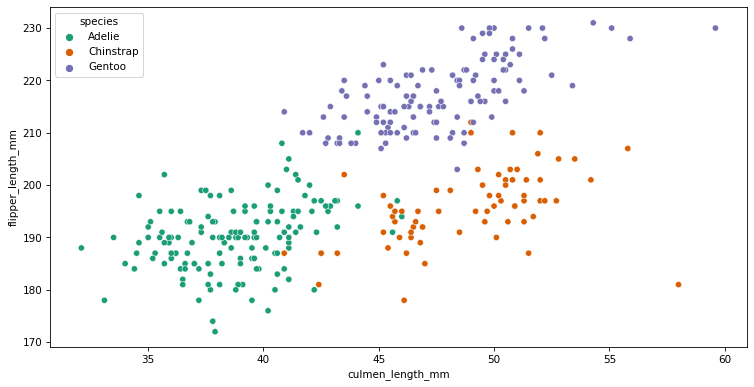

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', data=df, hue='species', palette='Dark2');

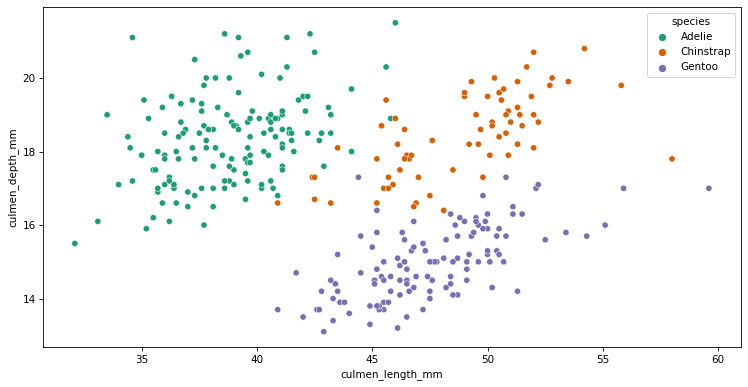

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', palette='Dark2');

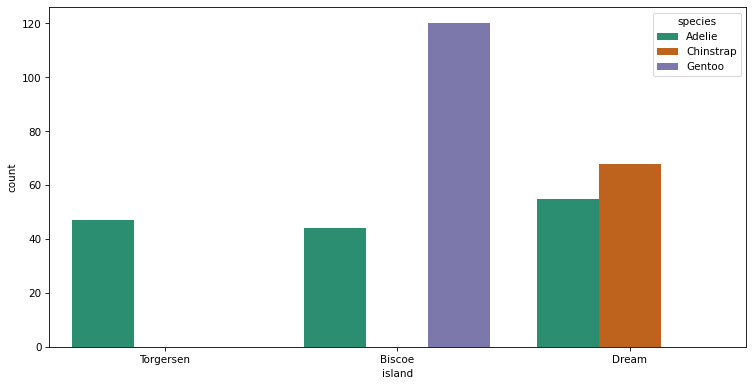

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.countplot(x='island', hue='species', data=df, palette='Dark2');

Based on image above, we can see that Gentoo species is only in Biscoe Island and Chinstrap species is only in Dream Island, but Adelie species is in the 3 island.

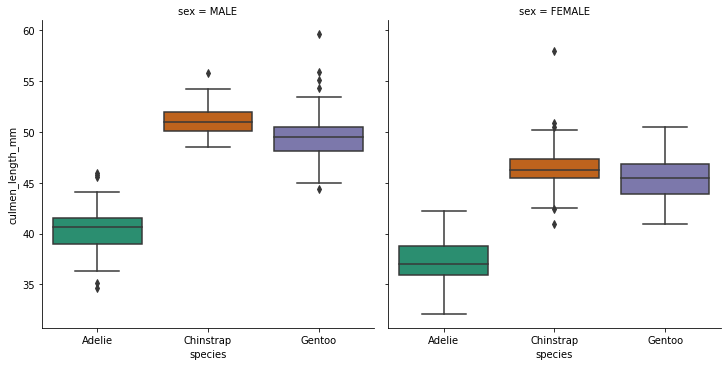

In [ ]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex', palette='Dark2');

Male culment length of each species bigger than female culment length

Male Adelie and Gento species are left-skewed distribution because there are some value that far lower than the median (the tail/whisker is longer to the left/bottom of median).

Female Adelie species have right-skewed distribution but Gentoo species have left-skewed distribution.

Both male and female Chinstrap species has normal distribution.

---

## **C. Random Forests Model Classifier**

**Tree Based Algorithm no need to scale the features because it will not use the features at the same time but will be split 1 by 1.**

### **a. Setup**



#### **Train | Test Split**

In [ ]:
X = pd.get_dummies(df.drop('species',axis=1), drop_first=True)
y = df['species']

In [ ]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [ ]:
X.shape

(334, 7)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

(233, 7)

In [ ]:
X_test.shape

(101, 7)

---

### **b. Create Estimator/Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#help(RandomForestClassifier)

In [ ]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=8, max_features='auto', random_state=101)

---

#### **Fit/Train Data**

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

---

#### **Feature Importance and Parameters**

Very useful attribute of the trained model!

In [ ]:
model.feature_importances_

array([3.57574248e-01, 1.50188234e-01, 2.23666347e-01, 1.29298168e-01,
       1.32646695e-01, 2.63187670e-05, 6.59998911e-03])

In [ ]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
island_Torgersen,0.000026
sex_MALE,0.006600
body_mass_g,0.129298
island_Dream,0.132647
culmen_depth_mm,0.150188
flipper_length_mm,0.223666
culmen_length_mm,0.357574


In [ ]:
# Number of Decision Tree (Estimator)
len(model.estimators_)

8

---

### **c. Performance Evaluation**

#### **Classification Metrics on Test Set**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[41,  0,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

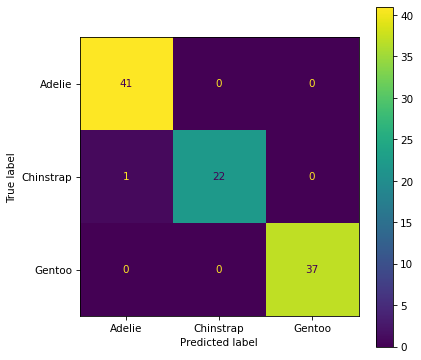

In [ ]:
fig, ax = plt.subplots(figsize=(6,6),dpi=75)
plot_confusion_matrix(model, X_test, y_test, ax=ax);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



Its performance is better than Decision Tree

---

#### **Visualize All the Trees**

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.tree import plot_tree

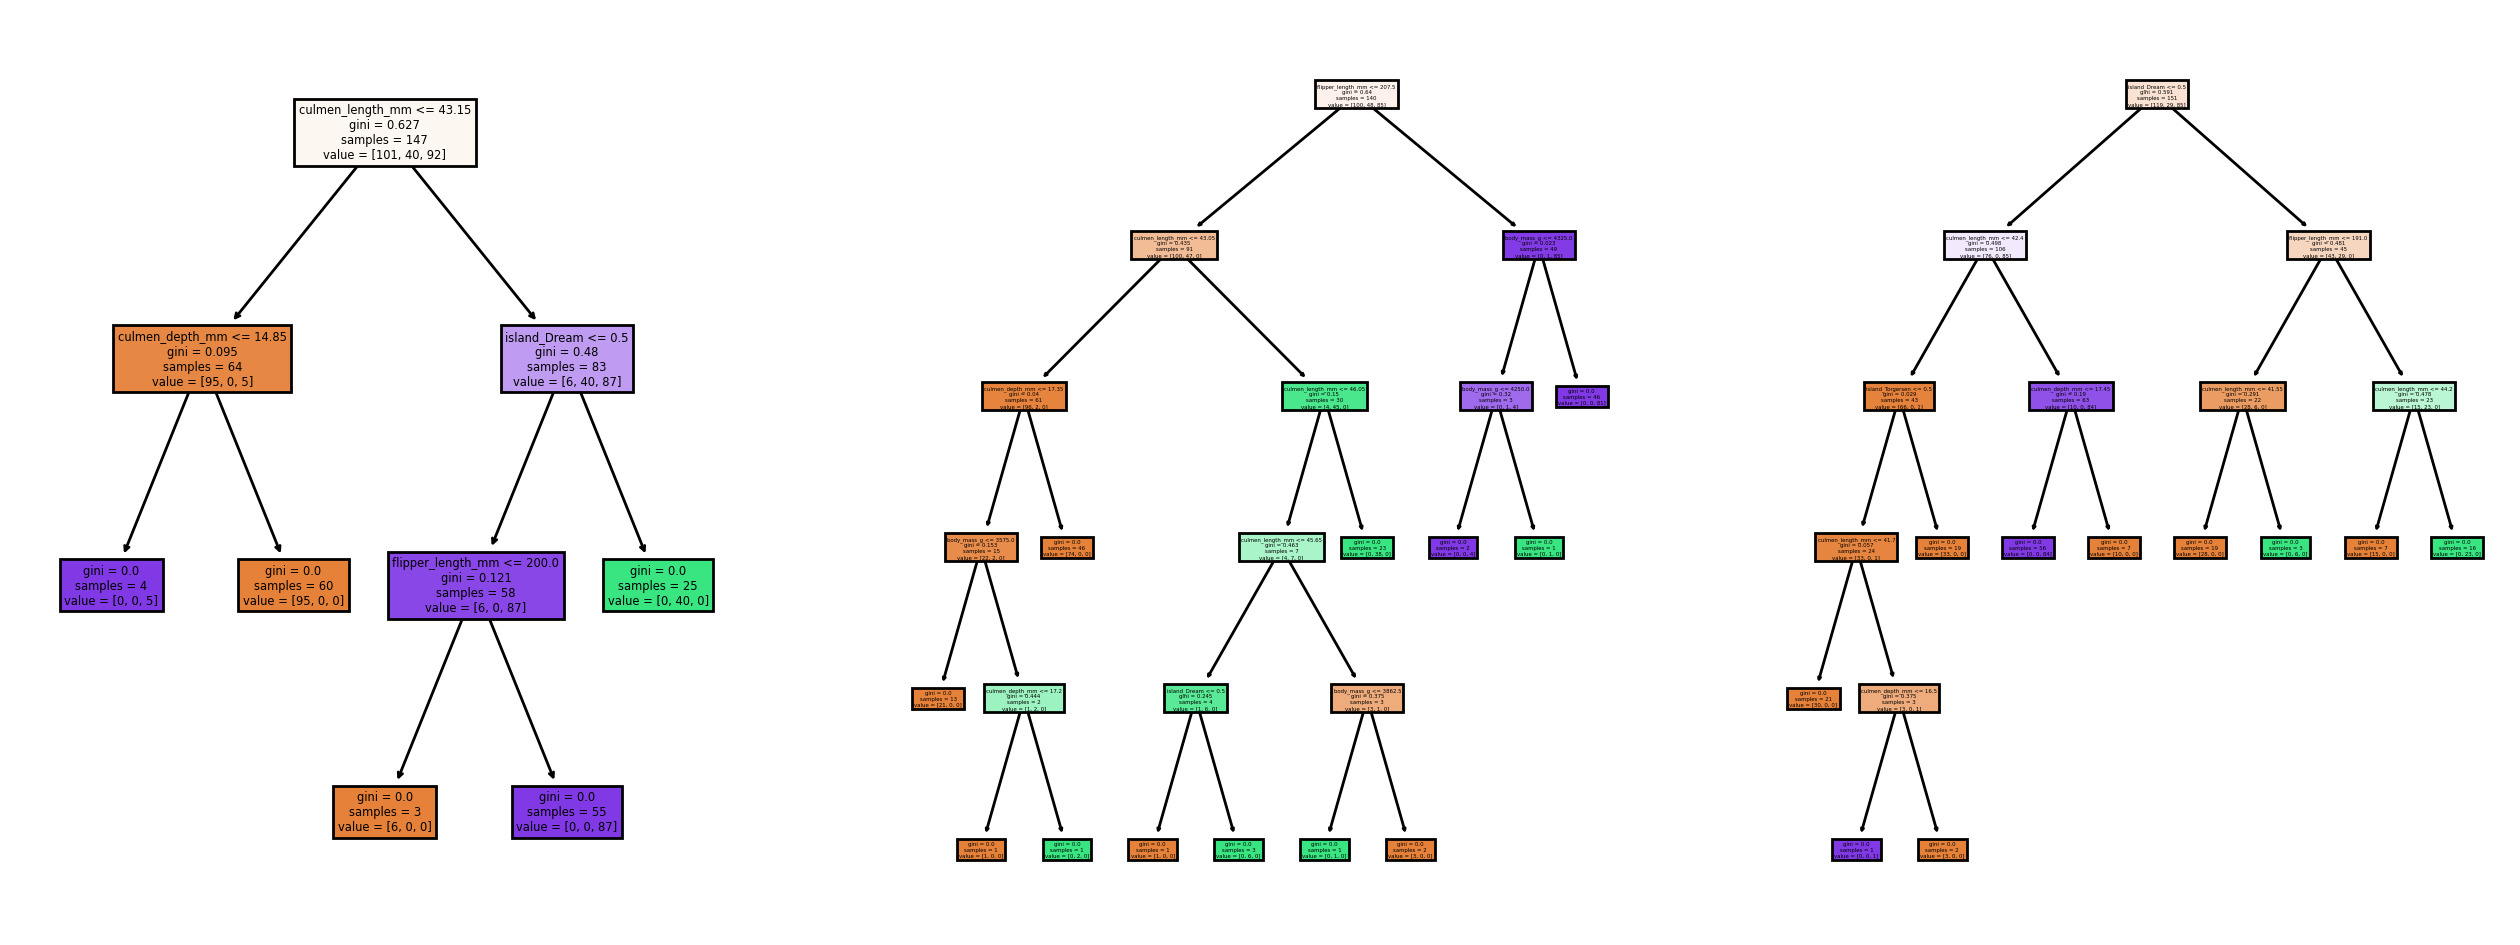

In [ ]:
# Estimator 1 to 3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6),dpi=200)
for i in range(3):
  plot_tree(model.estimators_[i], filled=True, feature_names=X.columns, ax=axes[i]);

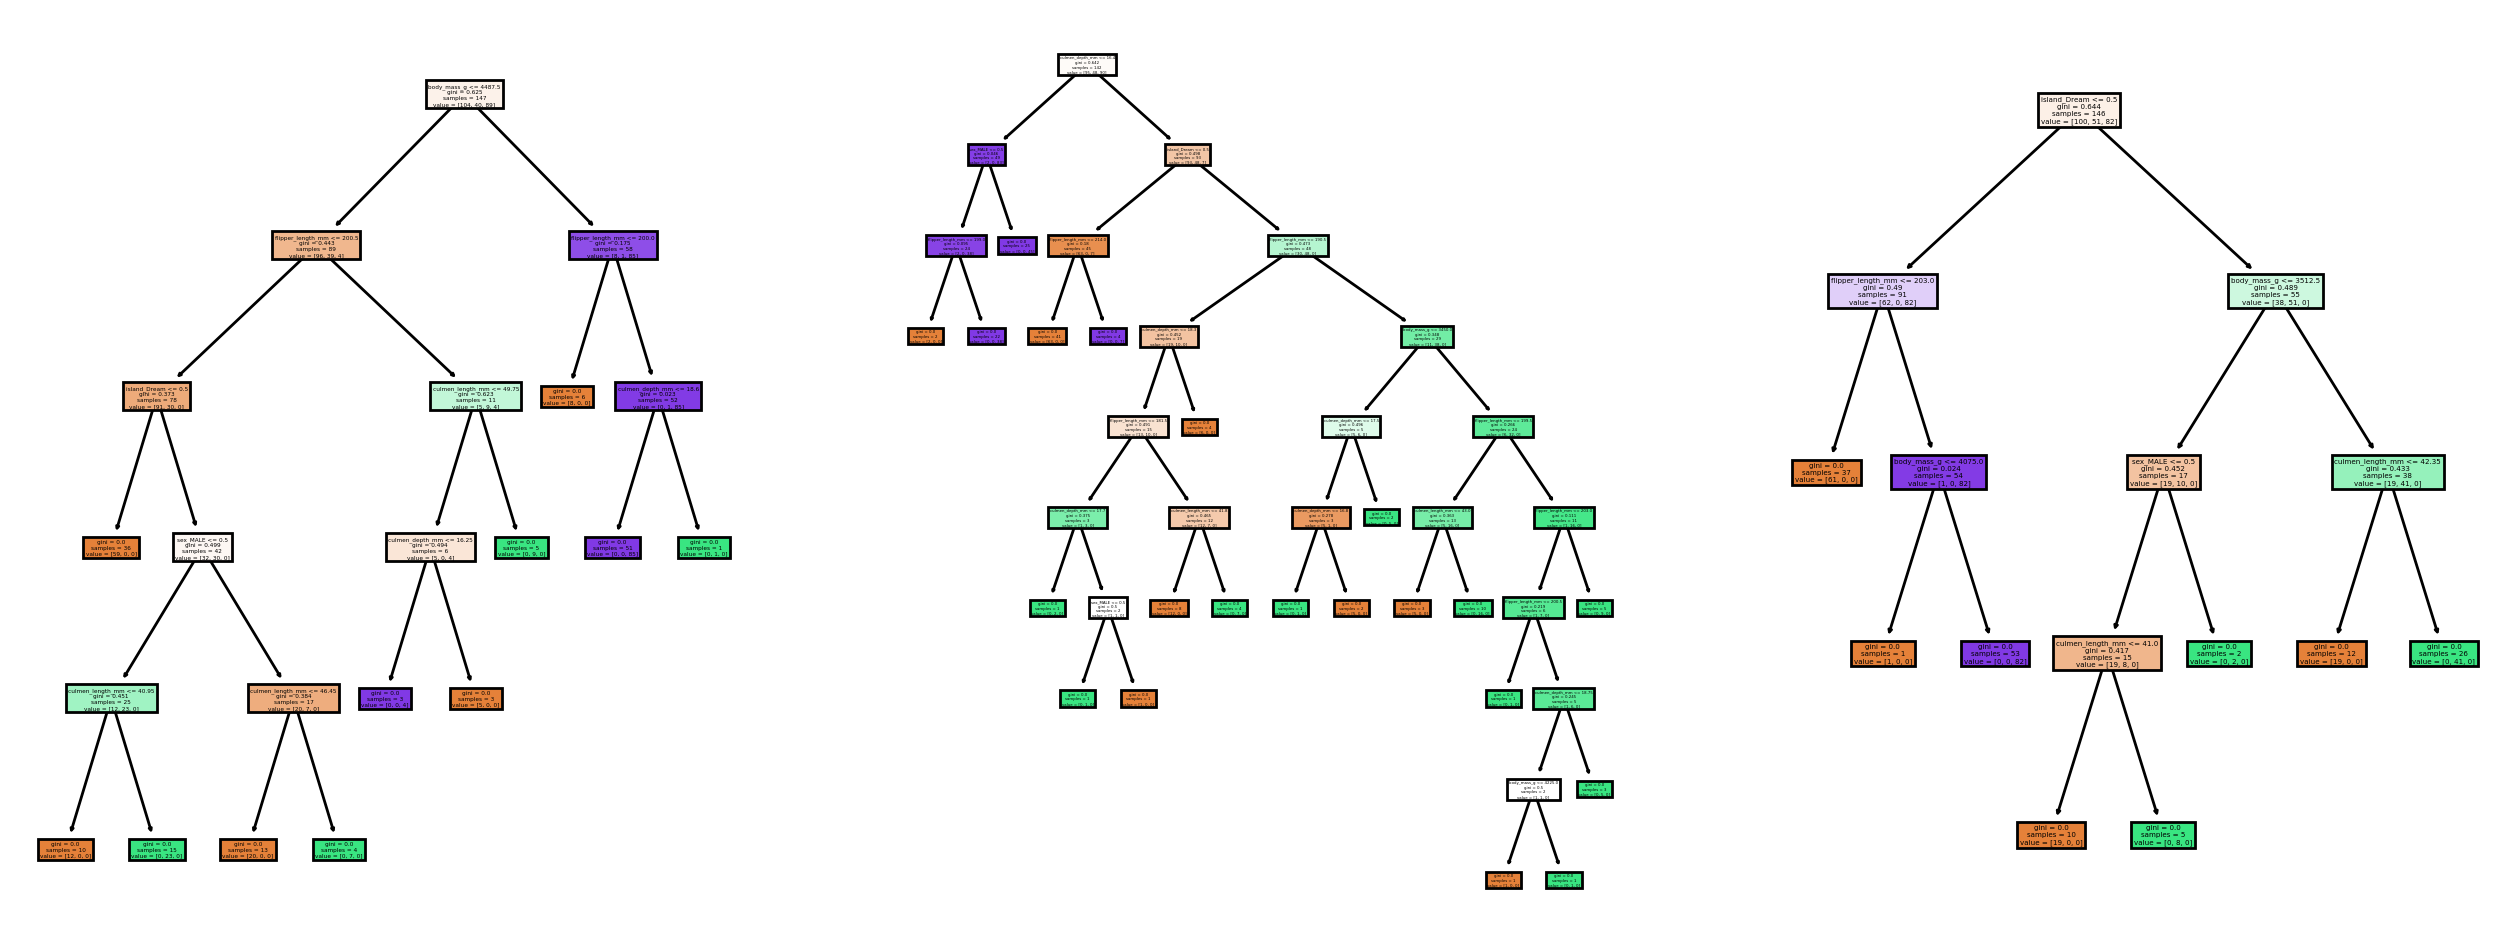

In [ ]:
# Estimator 4 to 6
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6),dpi=200)
for i in range(3,6):
  plot_tree(model.estimators_[i], filled=True, feature_names=X.columns, ax=axes[i-3]);

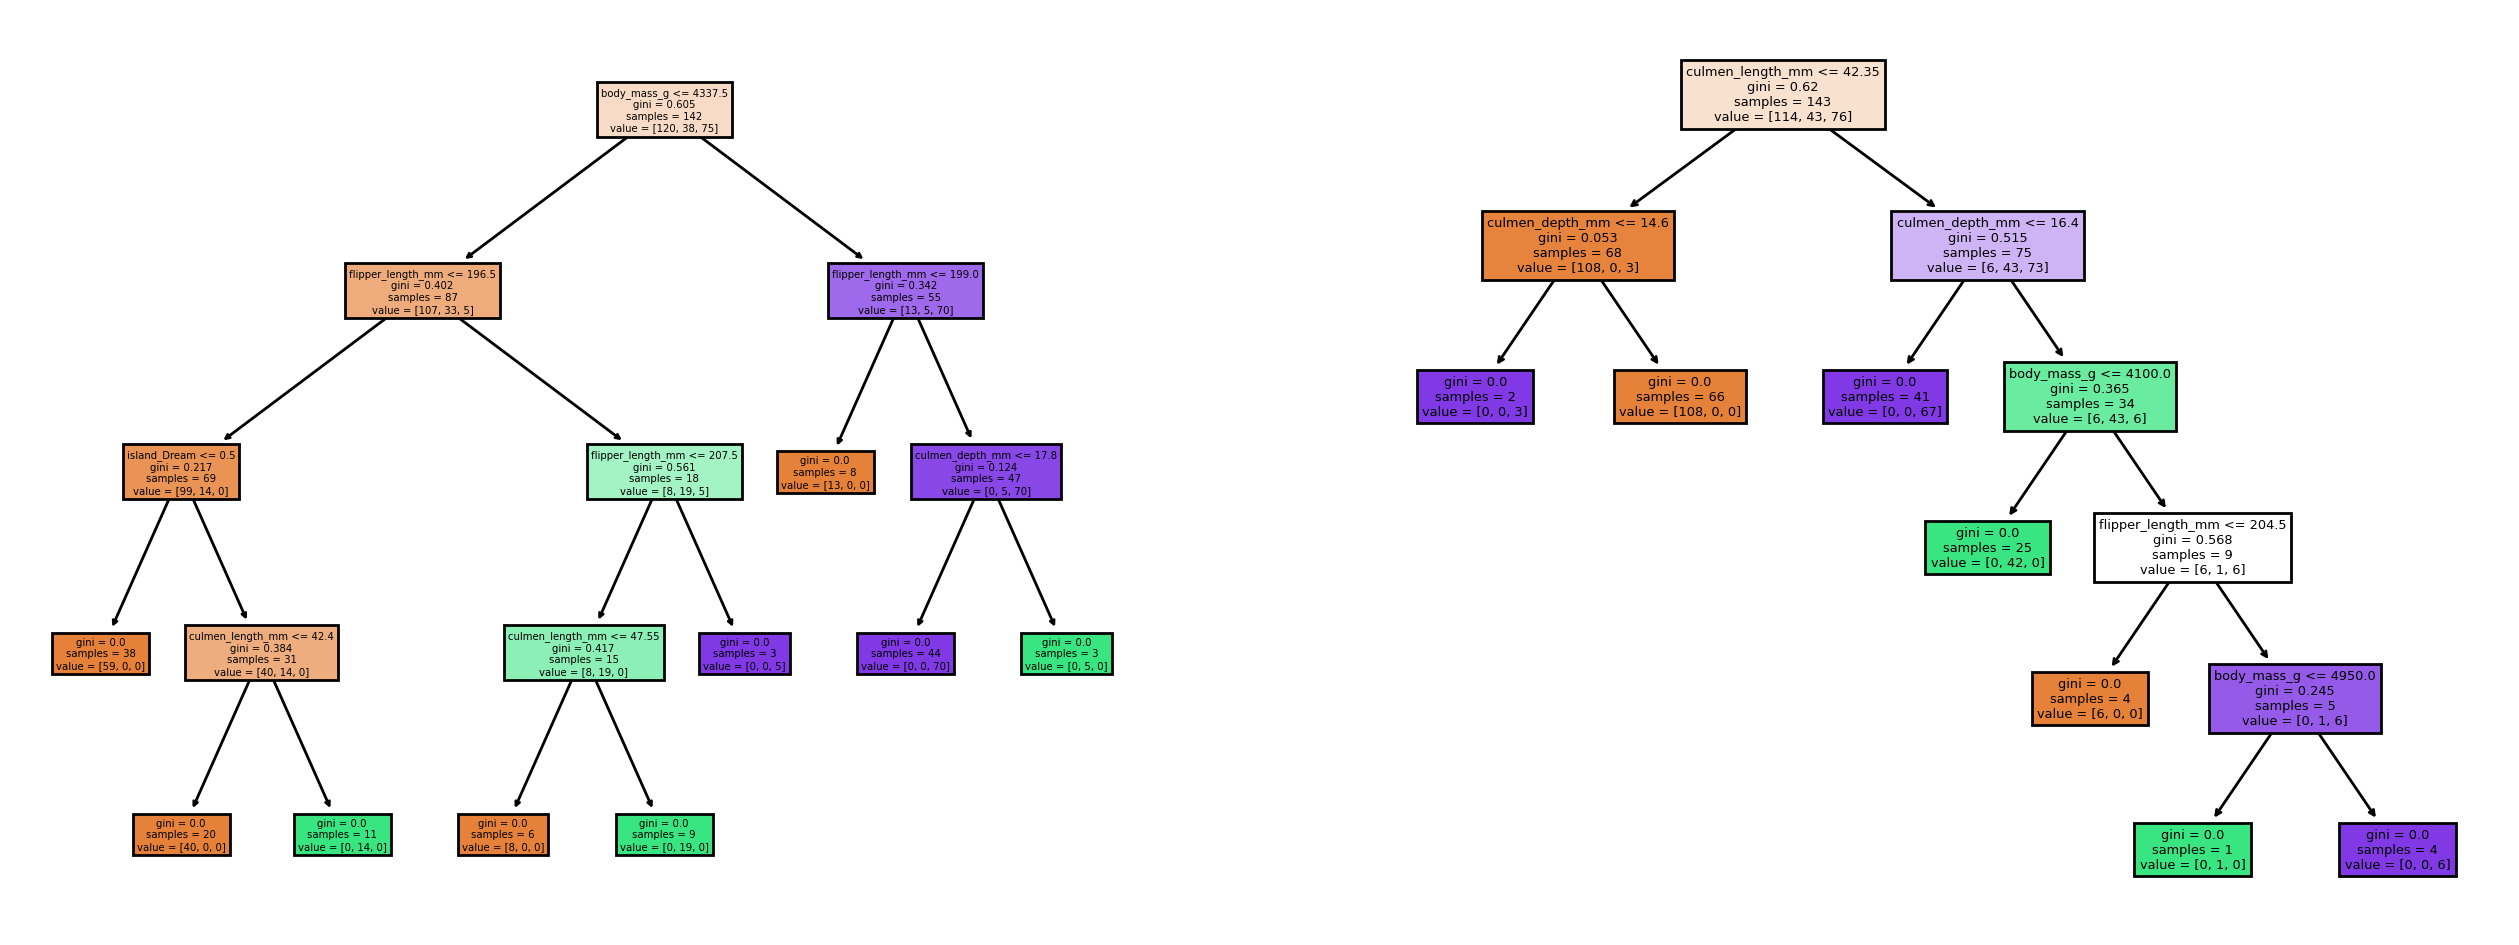

In [ ]:
# Estimator 7 to 8
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6),dpi=200)
for i in range(6,8):
  plot_tree(model.estimators_[i], filled=True, feature_names=X.columns, ax=axes[i-6]);

---

### **d. Number of Estimator vs Test Error**

Let's explore if continually adding more trees improves performance...

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Plot number of Estimator vs Test Error
test_error = []
misclassifications = []

for n in range(1,40):
    rfc = RandomForestClassifier(n_estimators=n, max_features='auto')
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_error.append(error)

    n_missed = np.sum(y_pred != y_test) # watch the video to understand this line!!
    misclassifications.append(n_missed)

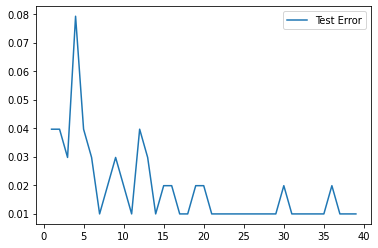

In [ ]:
plt.plot(range(1,40),test_error, label='Test Error')
plt.legend();

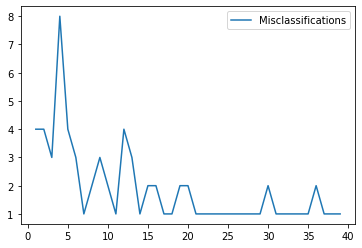

In [ ]:
plt.plot(range(1, 40),misclassifications, label='Misclassifications')
plt.legend();

Clearly there are diminishing returns, on such a small dataset, we've pretty much extracted all the information we can after about 5 trees.

---

## **D. Grid Search Hyper-Parameters**

**DATA SET**

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images. 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/12_Random_Forest/data_banknote_authentication.csv")

In [ ]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**FEATURES RELATIONSHIP**

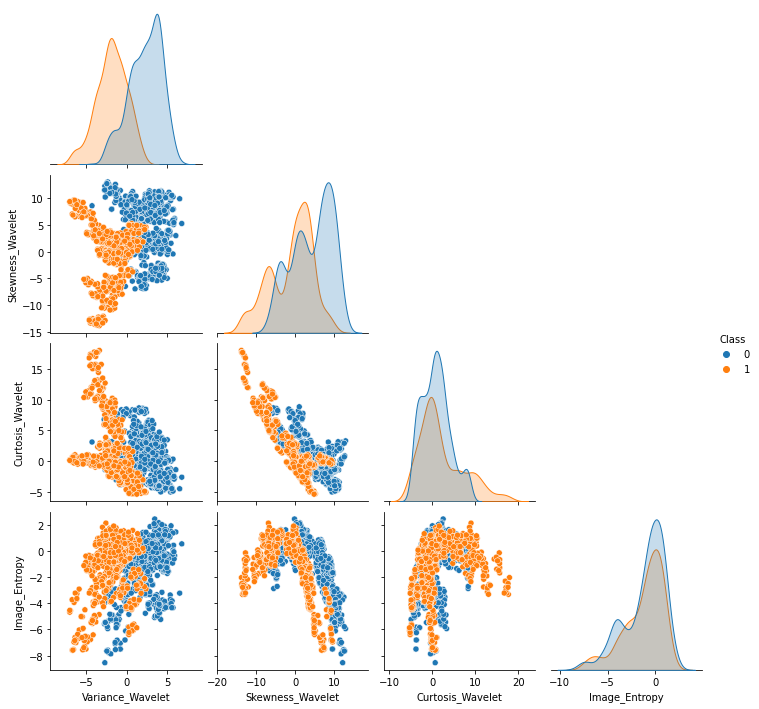

In [ ]:
sns.pairplot(df,hue='Class',corner=True);

**TRAIN | TEST SPLIT**

In [ ]:
X = df.drop("Class",axis=1)

In [ ]:
y = df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

**GRID SEARCH**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators=[64, 100, 128, 200]
max_features= [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [ ]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid, cv=5)

**TRAIN MODEL**

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

**COEFFICIENTS/PARAMETERS**

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [ ]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

False

In [ ]:
# With underscore, reports back fitted attribute of oob_score
#grid.best_estimator_.oob_score_

**PERFORMANCE EVALUATION**

In [ ]:
predictions = grid.predict(X_test)

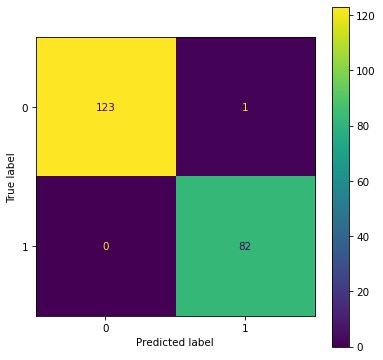

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), dpi=75)
plot_confusion_matrix(grid, X_test, y_test, values_format='d', ax=ax);

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



Let's plot out error vs. Number of Estimators

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
errors = []
misclassifications = []

for n in range(1,51):
    rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features= 2)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    n_missed = np.sum(y_pred != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

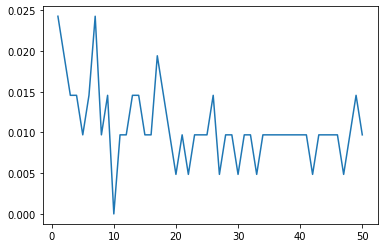

In [ ]:
plt.plot(range(1,51),errors);

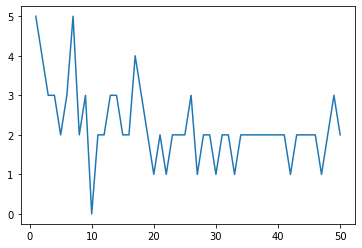

In [ ]:
plt.plot(range(1,51),misclassifications);

---
---

# **3 - Random Forest-Regression**




## **A. Data Set**

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!


They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/12_Random_Forest/rock_density_xray.csv")

In [ ]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [ ]:
df.columns=['Signal',"Density"]
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [ ]:
df.shape

(300, 2)

---

## **B. Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal   300 non-null    float64
 1   Density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


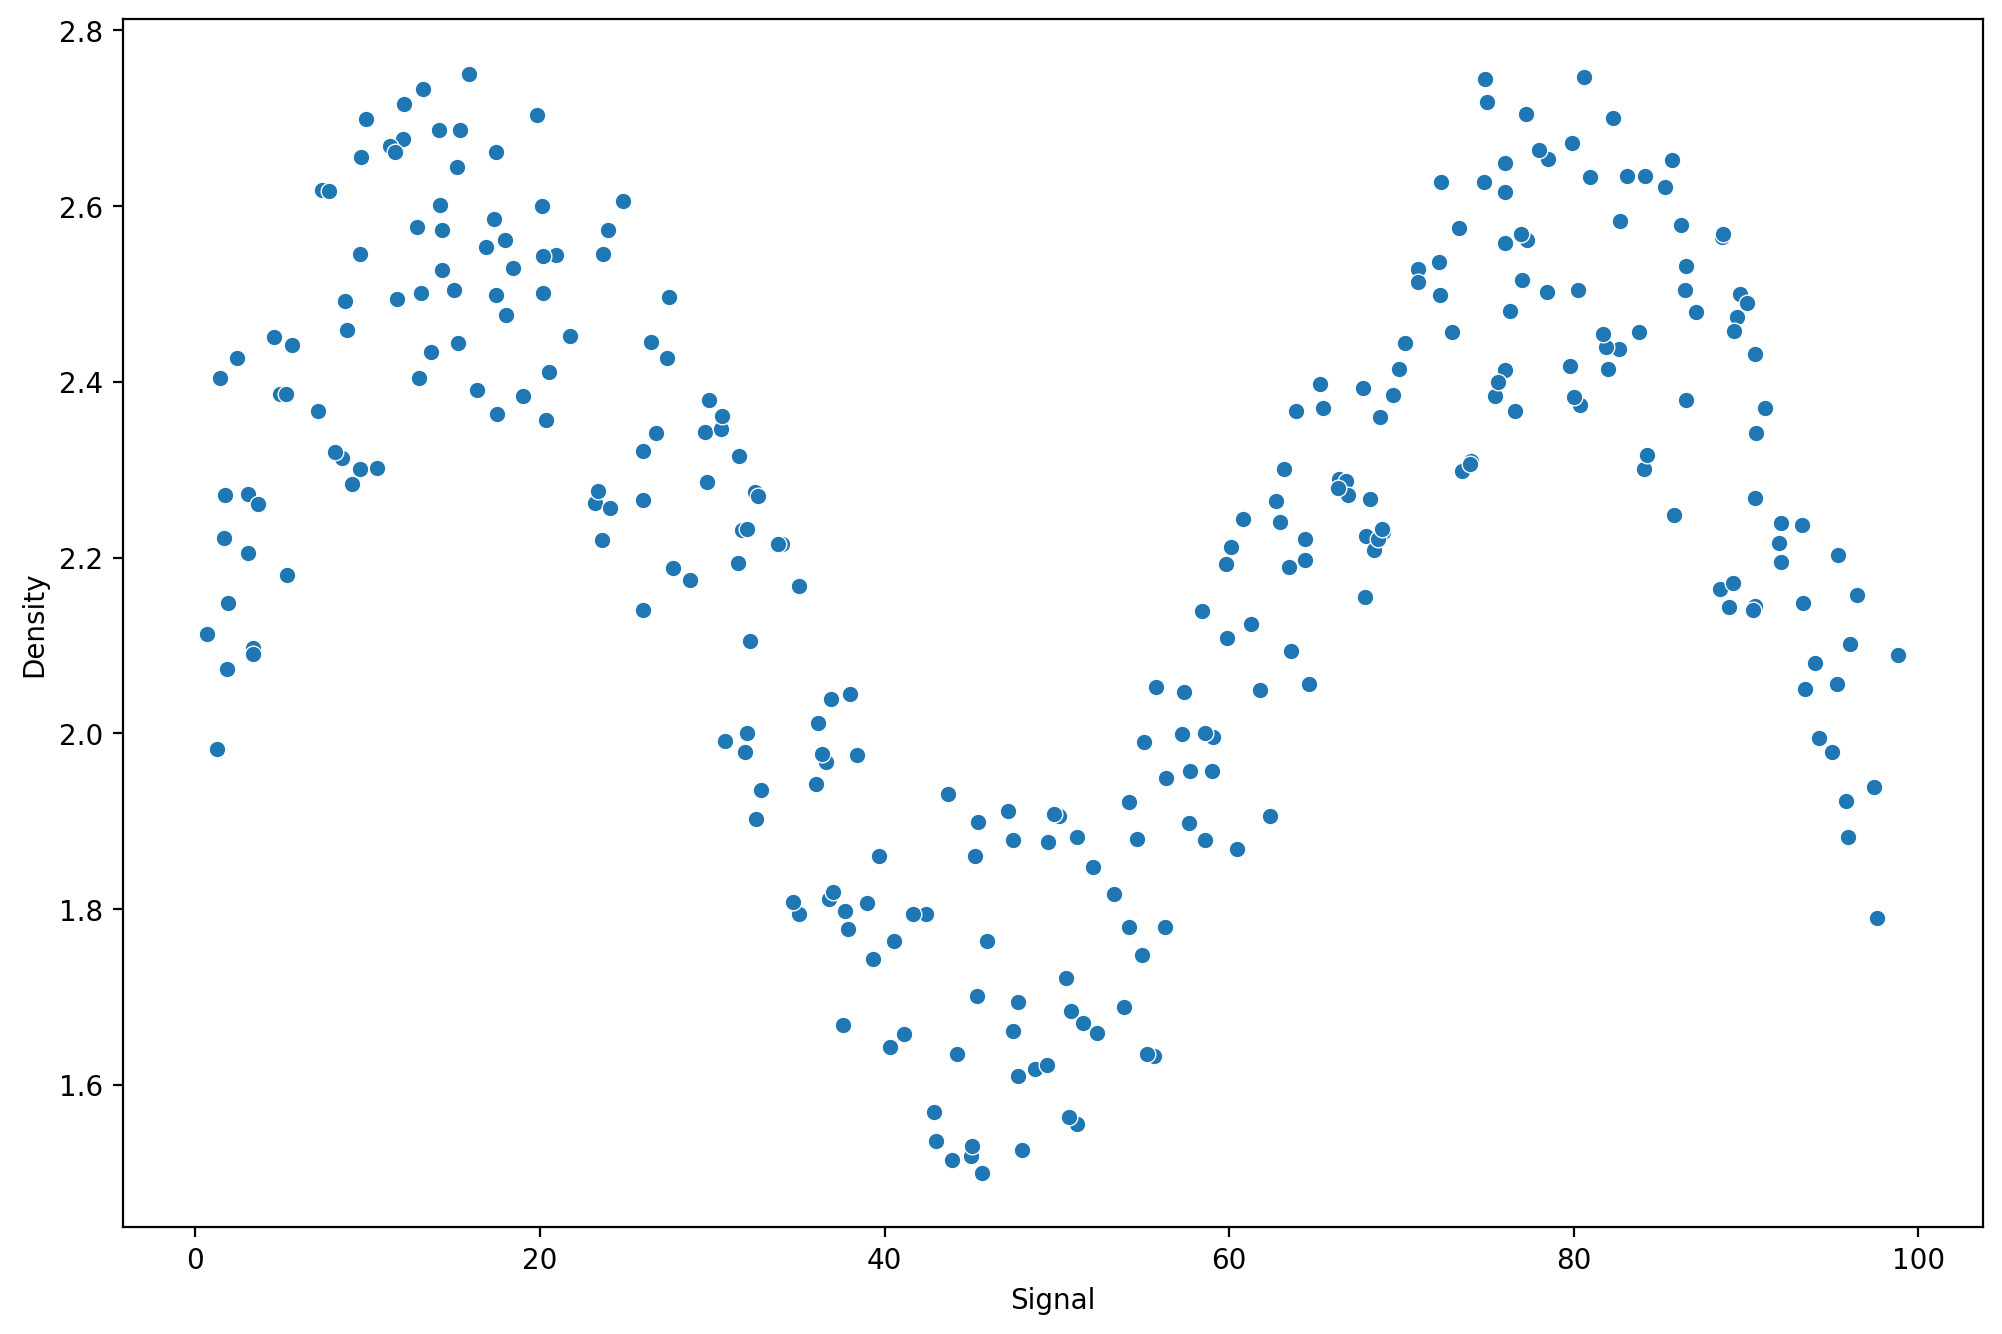

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df);

---

## **C. Regression Model**

### **a. Setup**

#### **Train | Test Split**

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [ ]:
X = df[['Signal']] 
y = df['Density']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
X_train.shape

(270, 1)

In [ ]:
X_test.shape

(30, 1)

---

### **b. Regression Model Comparison**

Test various regression model in this data set

In [ ]:
from sklearn.metrics import mean_squared_error

#### **Function to Help Run Models**

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    plt.plot(signal_range,output);

In [ ]:
def residual_plot(model, X_train, y_train, X_test, y_test):
    # Fit Model
    model.fit(X_train, y_train)
    
    # Get Residual Value
    preds = model.predict(X_test)
    y_residuals = y_test - preds

    # Plot Residual
    plt.figure(figsize=(6,6),dpi=75)
    sns.scatterplot(x=y_test, y=y_residuals, color='black')
    plt.xlabel('y_test')
    plt.ylabel('y_residuals')
    plt.axhline(y=0, color='r', linestyle='--');

---


#### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

RMSE : 0.2570051996584629


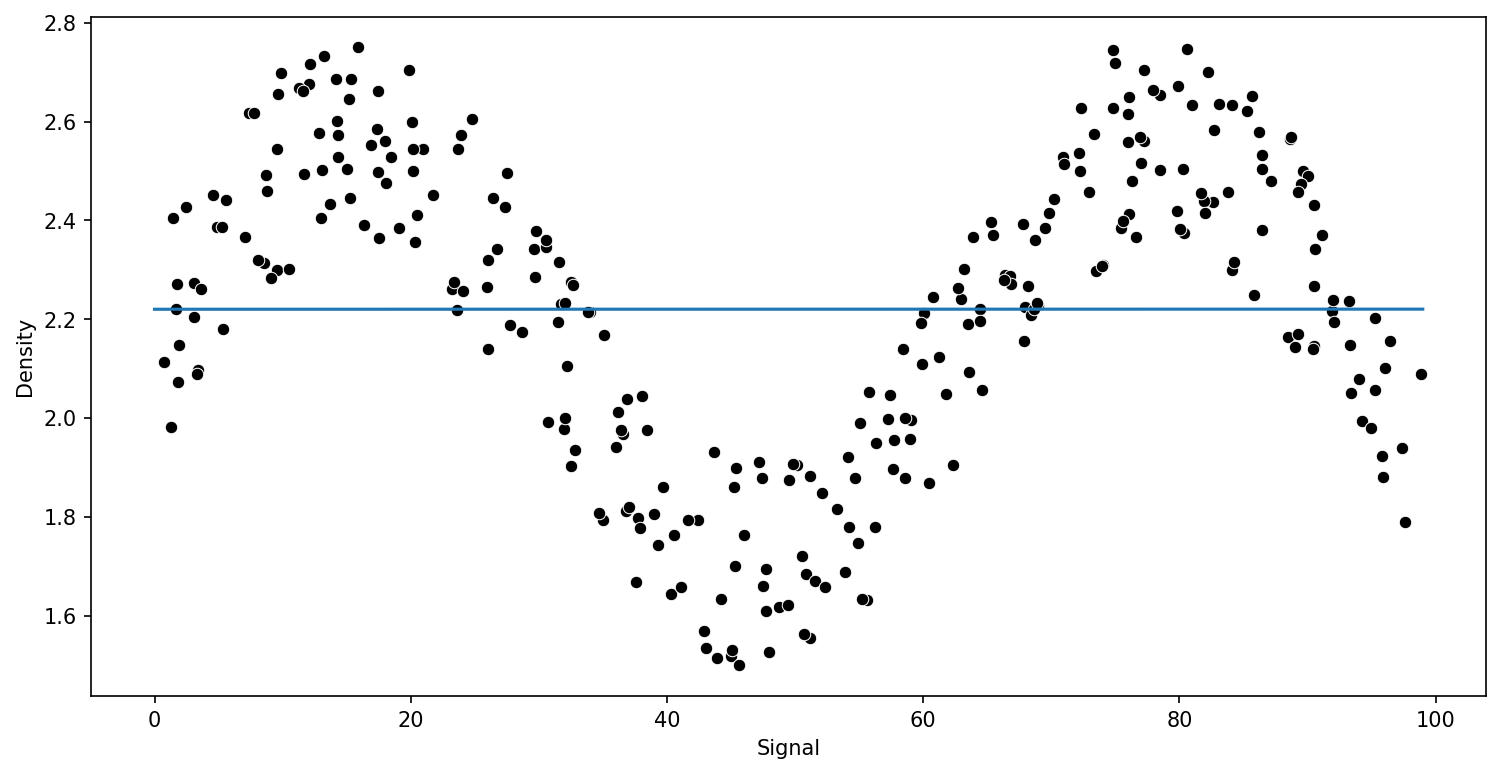

In [ ]:
run_model(model,X_train,y_train,X_test,y_test)

---
**The error is low but the regression line is not generalized, how to solve this?**

**You can compare visually between y_test and y_prediction, if y_prediction not distributed around y_test, then something is wrong.**

**You can also use residual plot to solve this.**

---

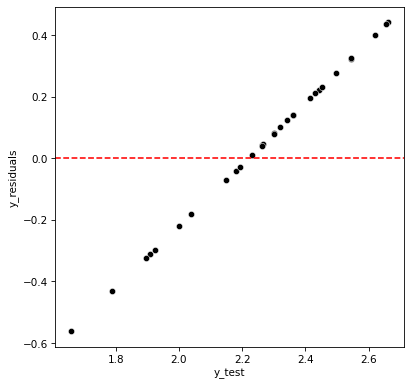

In [ ]:
residual_plot(model,X_train,y_train,X_test,y_test)

Based on above image, the residual plot showing a linear pattern, indicating Linear Regression is not valid choice for this data.

---


#### **Polynomial Regression**

**Attempting with a Polynomial Regression Model**

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

##### **Pipeline for Poly Orders**

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())

RMSE : 0.2817309563725596


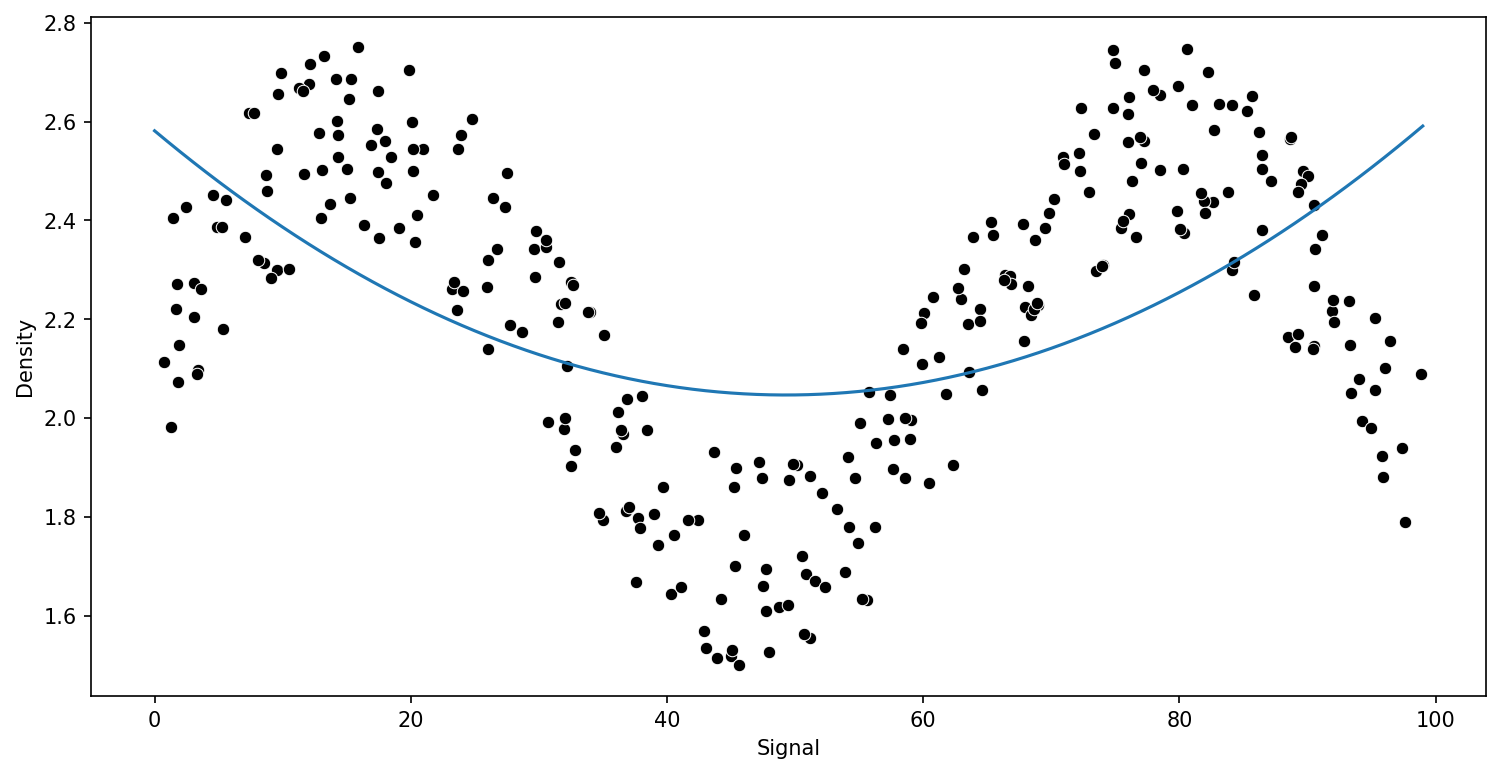

In [ ]:
run_model(pipe,X_train,y_train,X_test,y_test)

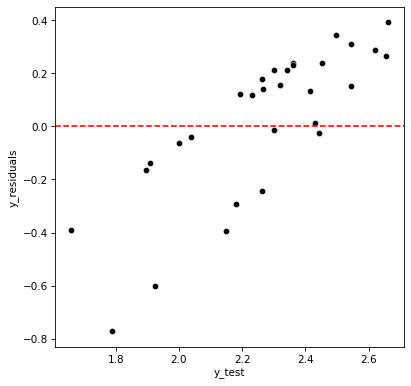

In [ ]:
residual_plot(pipe,X_train,y_train,X_test,y_test)

---

##### **Comparing Various Polynomial Orders**

RMSE : 0.14452815296528626


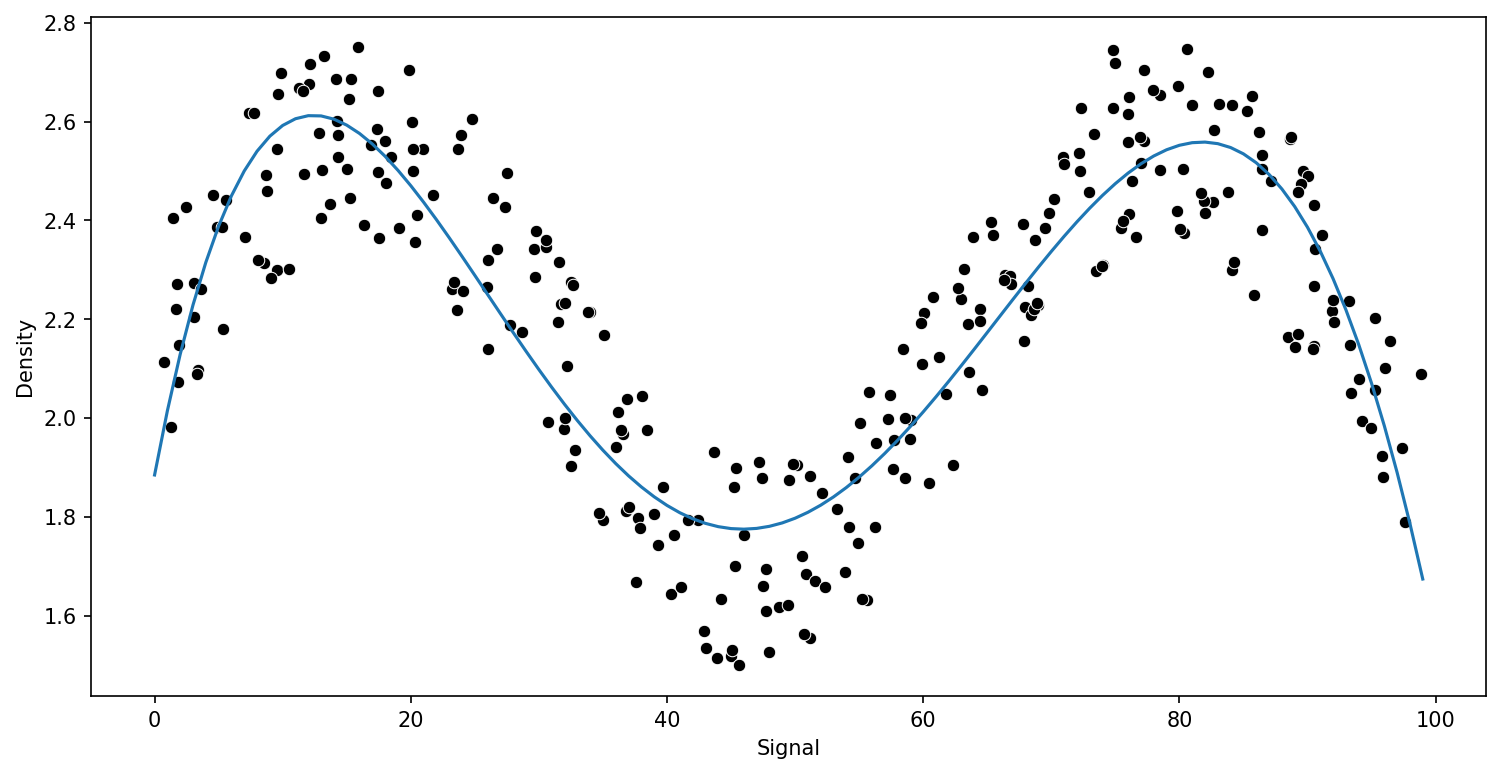

In [ ]:
pipe = make_pipeline(PolynomialFeatures(5), LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

**We dont know if this model is good for Signal that not in the data set (the poly line will be same as image above), so we need more robust model for Signal range outside 0-100**

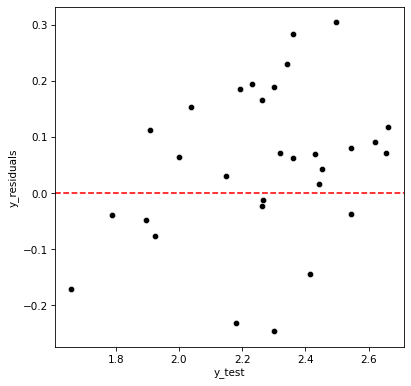

In [ ]:
residual_plot(pipe,X_train,y_train,X_test,y_test)

---


#### **KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


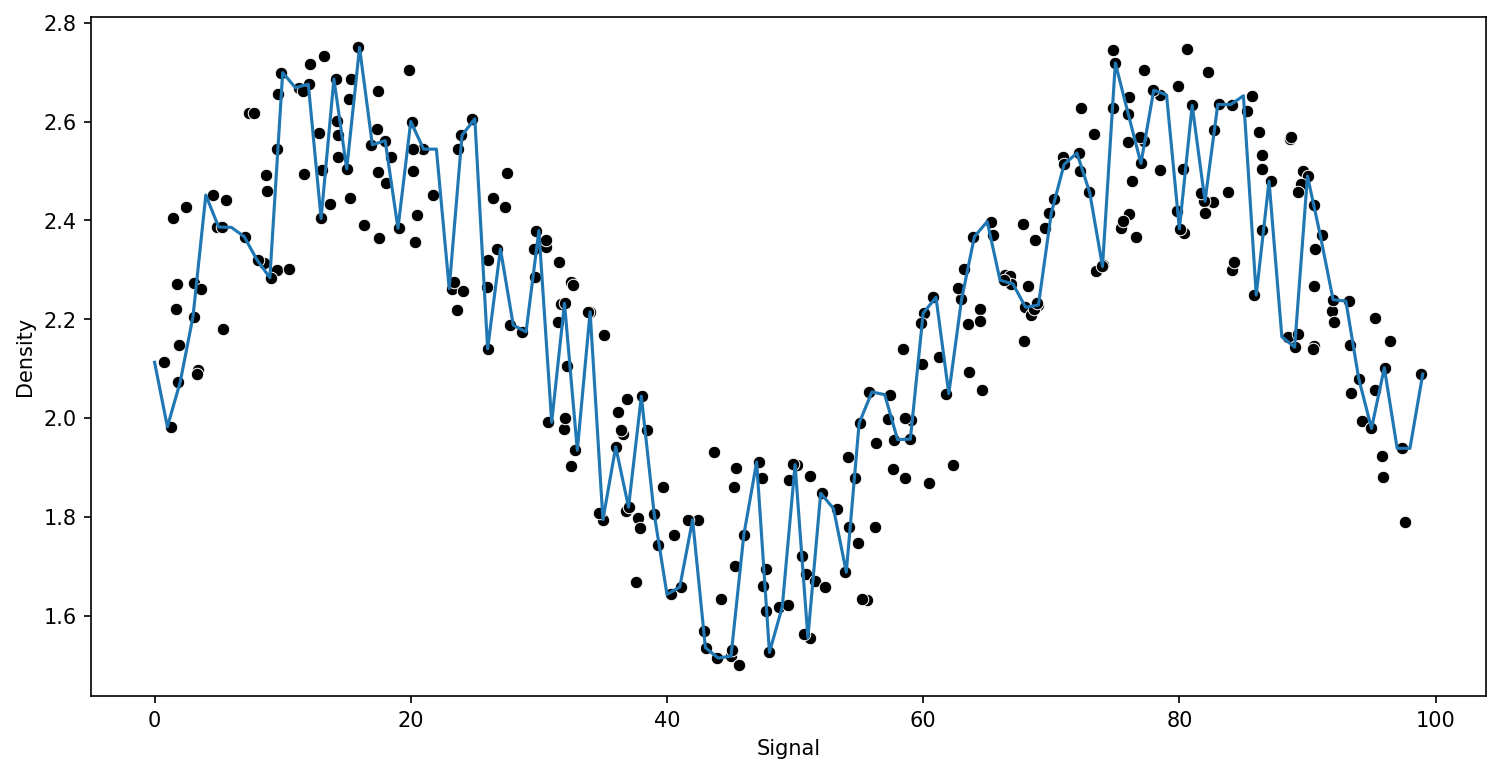

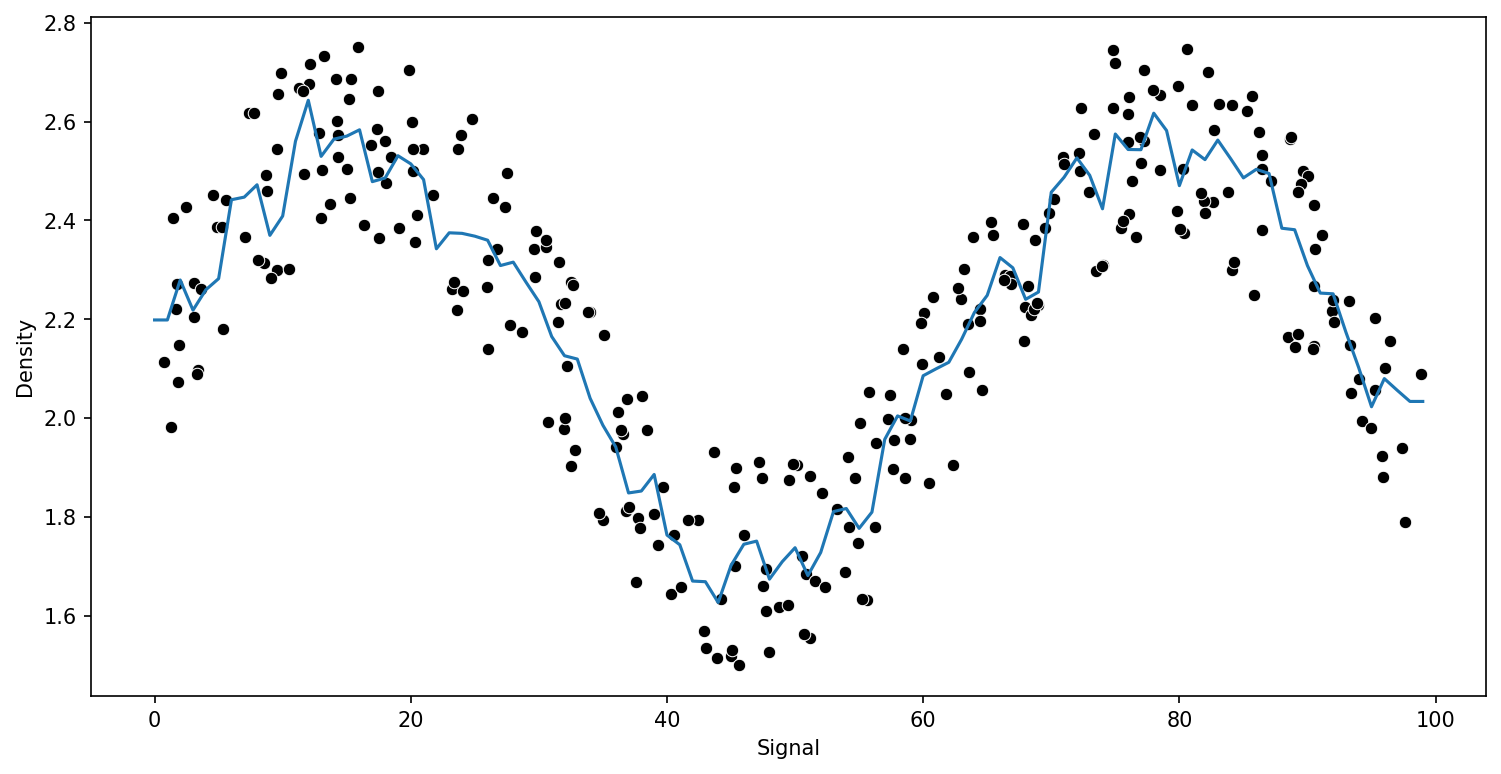

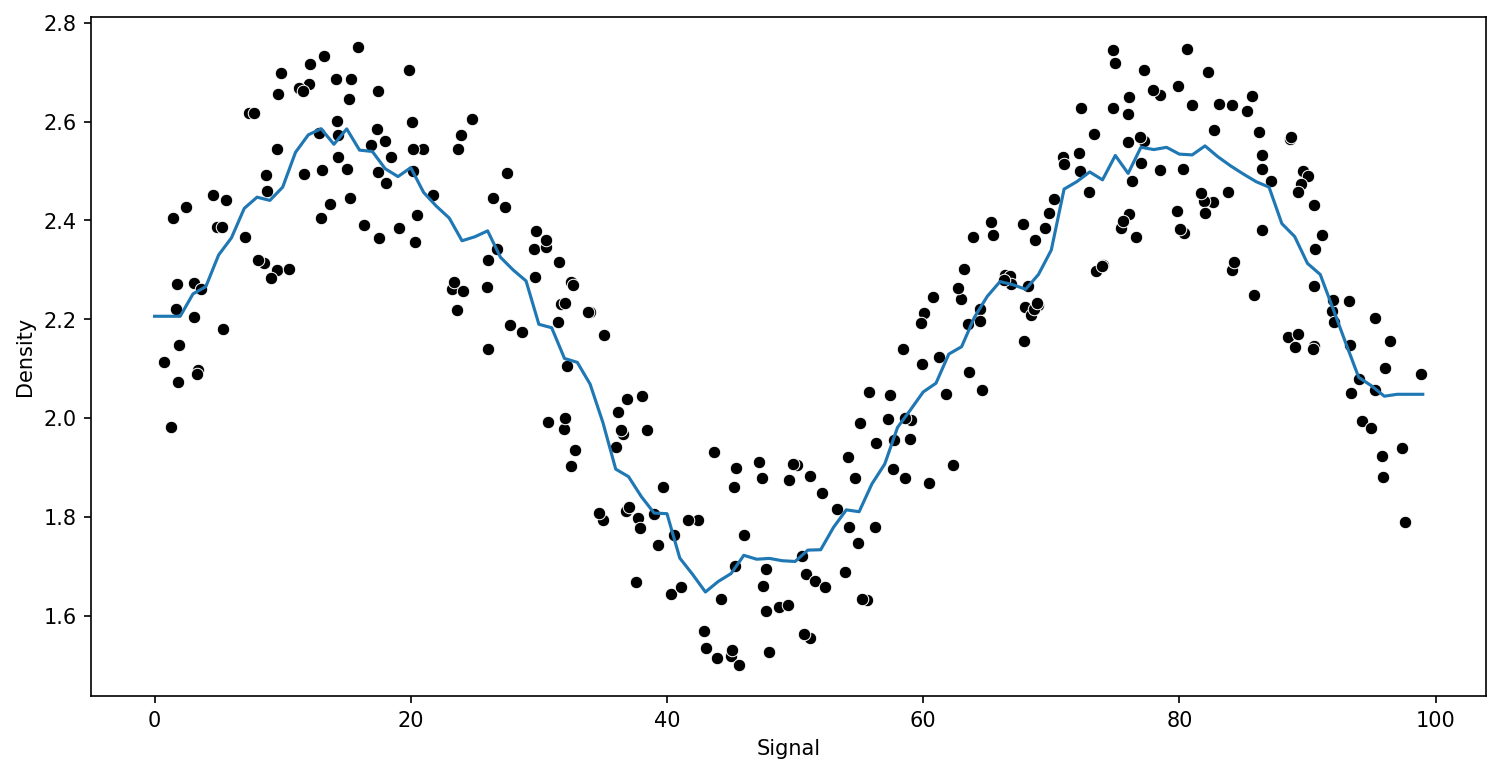

In [ ]:
#preds = {}
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

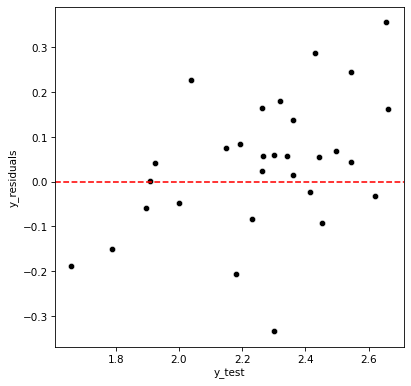

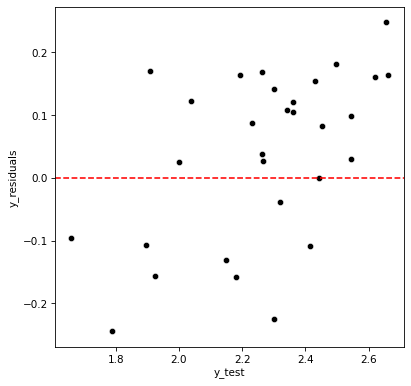

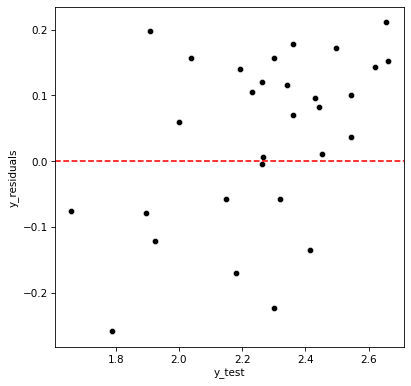

In [ ]:
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    residual_plot(model,X_train,y_train,X_test,y_test)

---

#### **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.15234870286353372


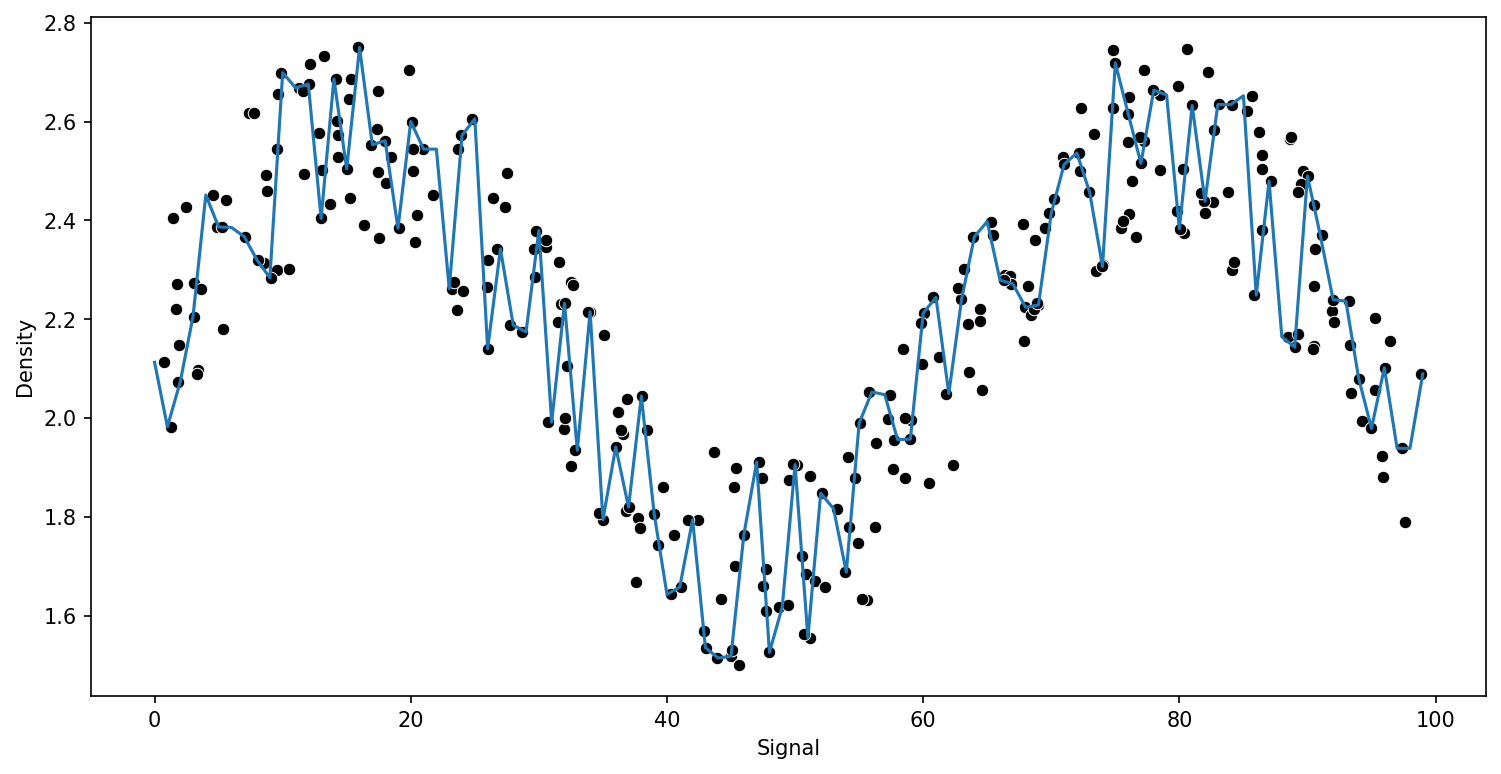

In [ ]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
model.get_n_leaves()

268

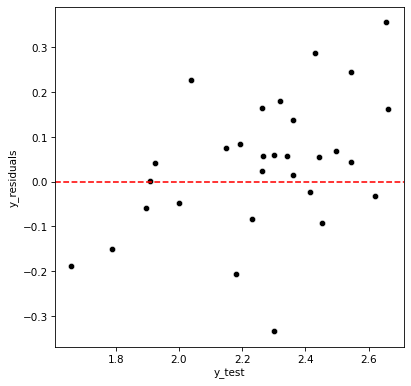

In [ ]:
residual_plot(model,X_train,y_train,X_test,y_test)

---

#### **Support Vector Regression**

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [ ]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12634668775105407


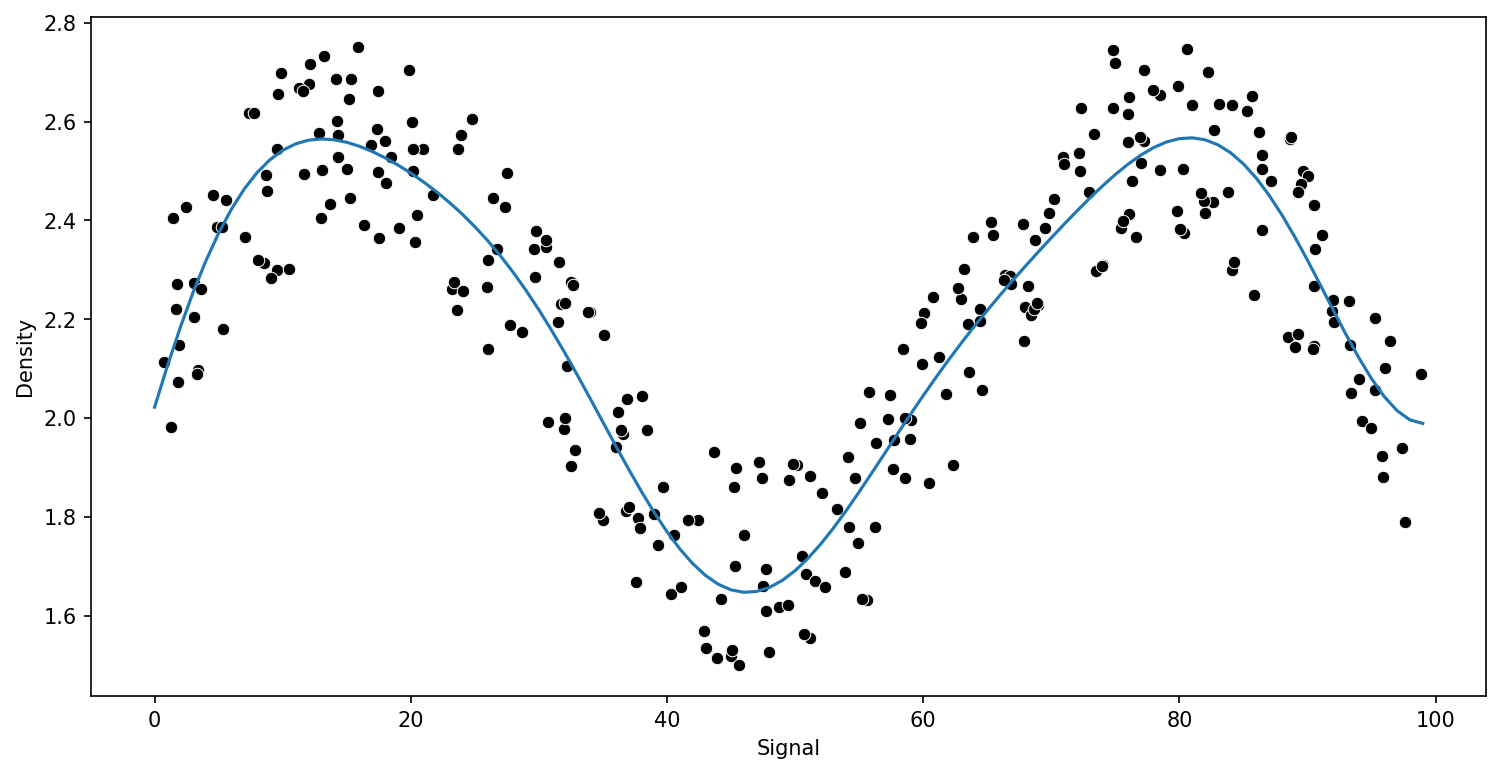

In [ ]:
run_model(grid,X_train,y_train,X_test,y_test)

In [ ]:
grid.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

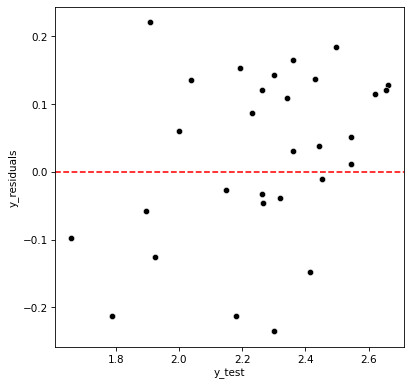

In [ ]:
residual_plot(grid,X_train,y_train,X_test,y_test)

---



#### **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# help(RandomForestRegressor)

RMSE : 0.14820158033306985
RMSE : 0.13371040201307396
RMSE : 0.13480281360062848


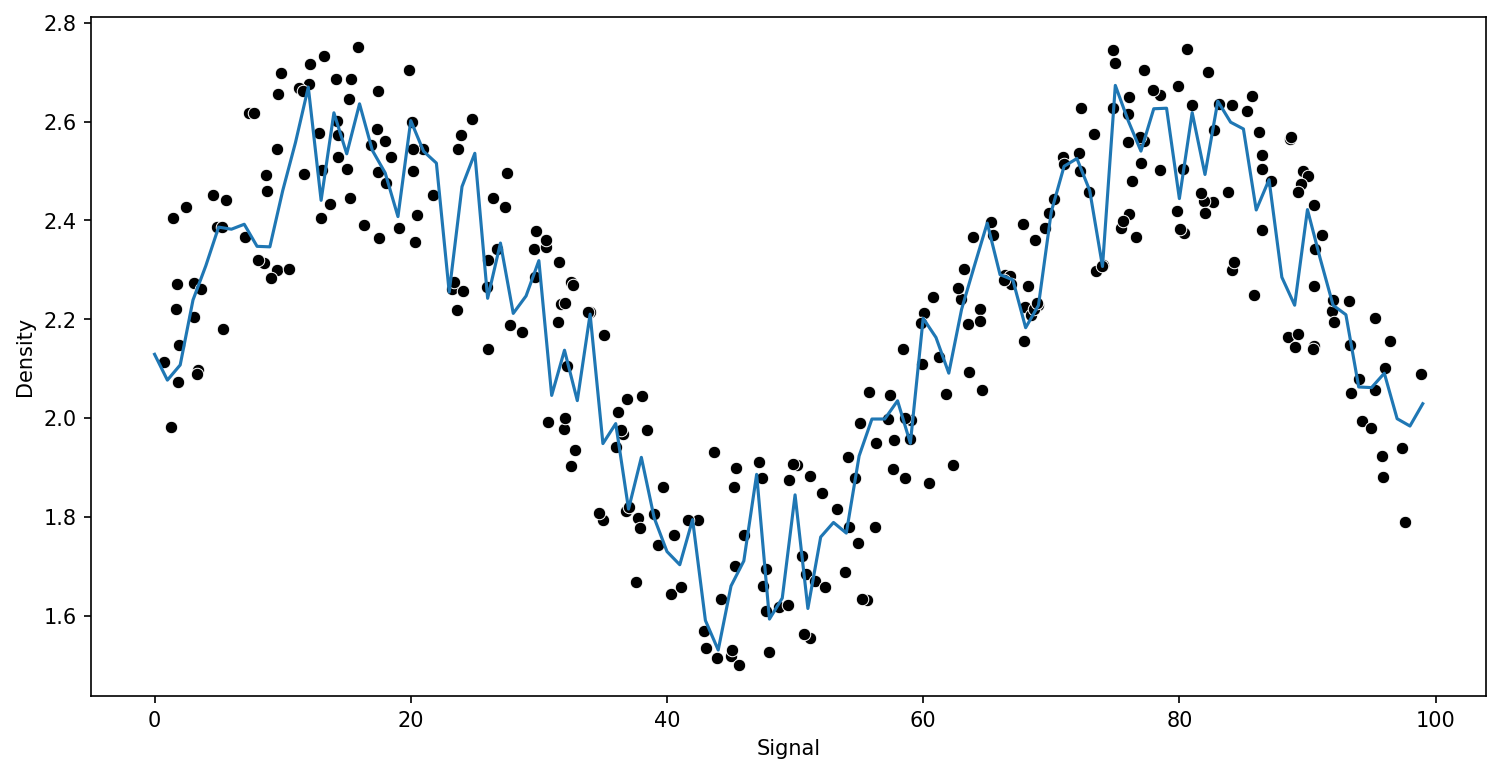

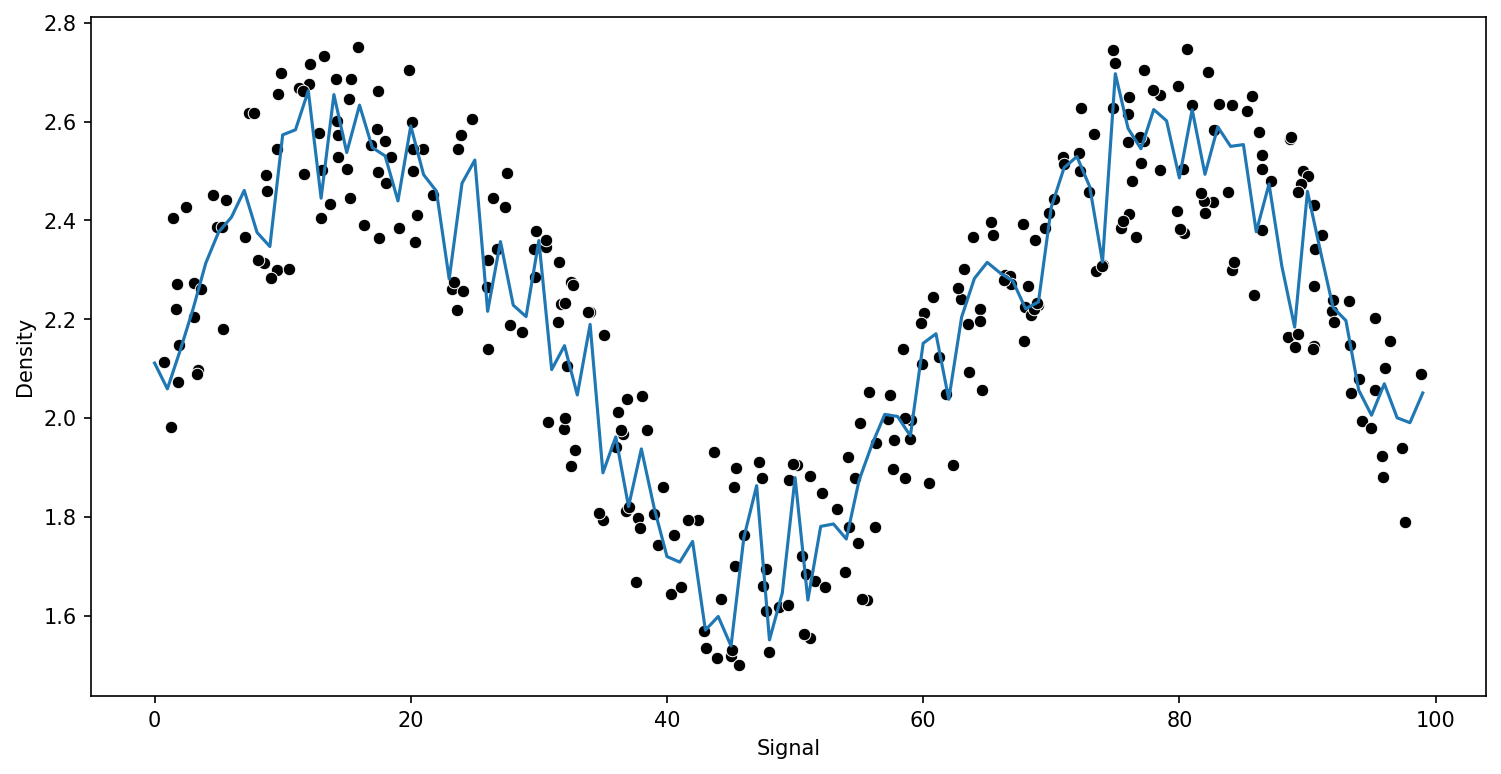

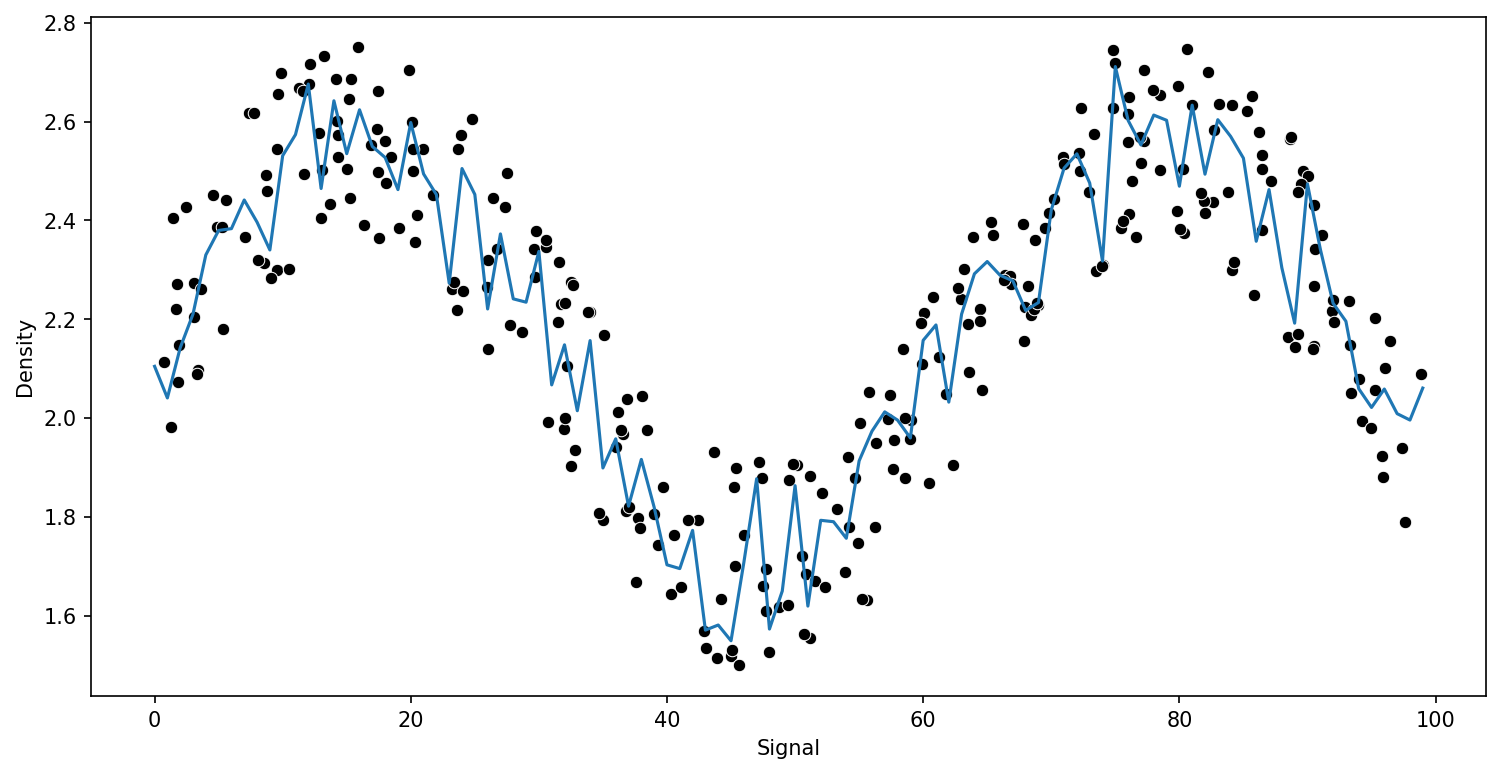

In [ ]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

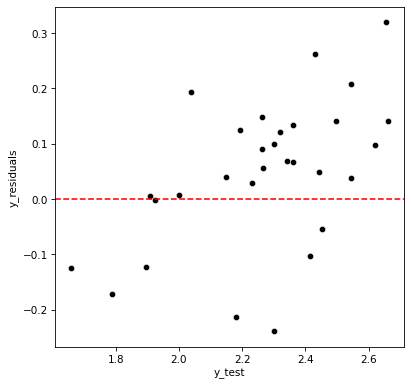

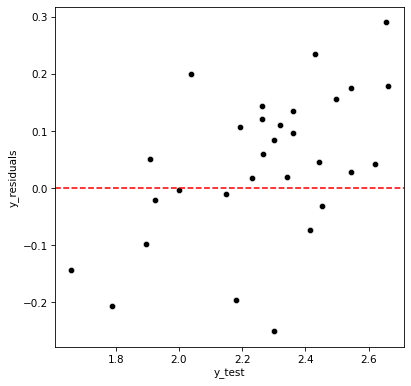

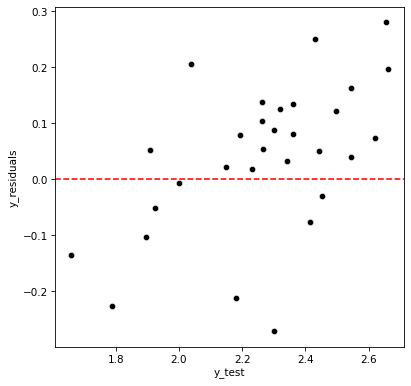

In [ ]:
trees = [10,50,100]

for n in trees:
    model = RandomForestRegressor(n_estimators=n)
    residual_plot(model,X_train,y_train,X_test,y_test)

---

#### **Gradient Boosting**



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


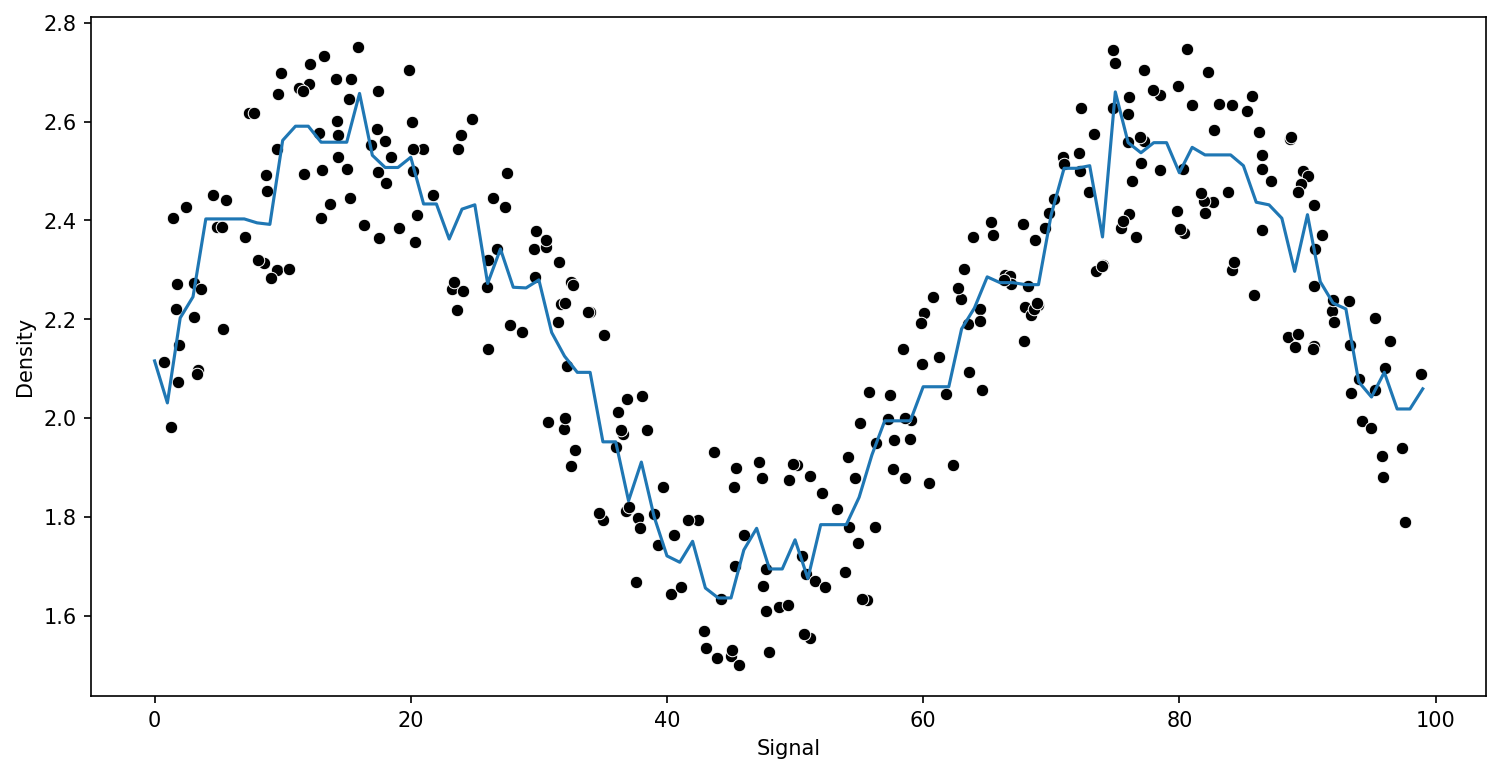

In [ ]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

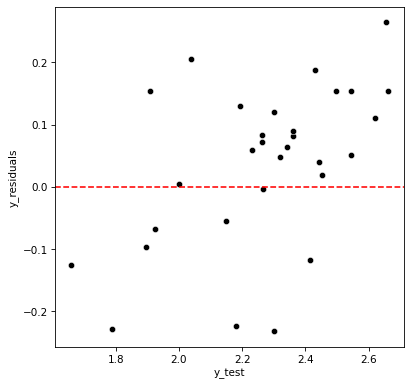

In [ ]:
residual_plot(model,X_train,y_train,X_test,y_test)

---

#### **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13784510679596745


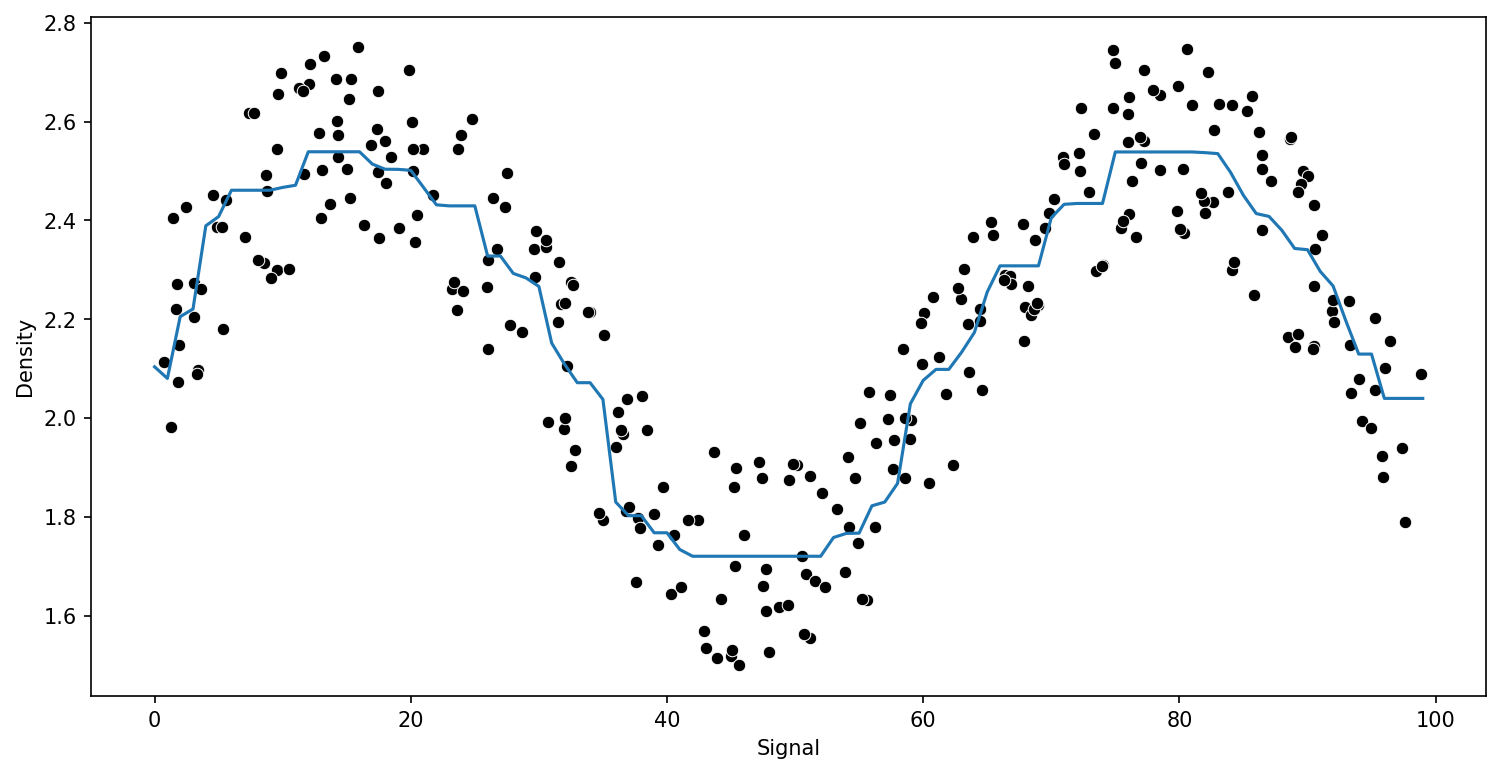

In [ ]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)

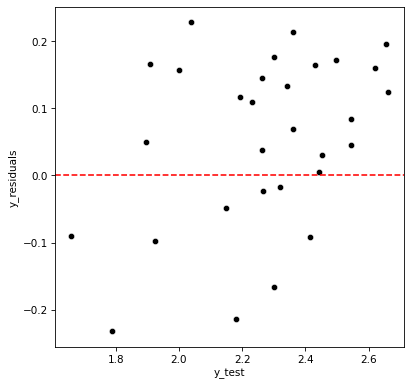

In [ ]:
residual_plot(model,X_train,y_train,X_test,y_test)

---
---